### Student Information
Name: 朱健宇

Student ID: 112062663

GitHub ID: Chienyu-Chu (#147141420)

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

---

## Part 1: Take home exercises

### >>> Exercise 1

<u>Task</u>: print out the first 3 *text* data in the 20 Newsgroups dataset.

By the following code, I imported the dataset and print out the data successfully.

In [1]:
# import the dataset.
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

# print the data.
for t in twenty_train.data[:3]:
    print(t)  

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me solve.

	Background of the problem:
	I have a rectangular mesh in the uv

### >>> Exercise 2

<u>Task</u>: Experiment with other querying techniques (other than `loc` and `iloc`) using pandas dataframes. 

To utilize pandas dataframes, the first step is to convert the dataset into the dataframe.
The following code successfully replicates the correct format of the dataframe.

In [2]:
import pandas as pd

# load the helper functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add the categories of text data to the dataframe 
X['category'] = twenty_train.target

# add the label for the categories
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

# check the format
X[:10]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9  From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian  
4  soc.religion.christian  
5  soc.religion.christian  
6  soc.religion.christian  
7                 sci.med  
8                 sci.med  
9                 sci.med

First, I want to show the powerful `query()` method.

The `query()` method queries the dataframe by input expression *string*. It returns rows which satisfy the expression. This method is similar to `WHERE` statement in SQL, hence quite intuitive.

For example, I can do label-based search (similar to `loc`) by it. The following shows all the records belonging to the `comp.graphics` category. 

In [3]:
X.query('category_name == "comp.graphics"')

text  category  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
11    From: amjad@eng.umd.edu (Amjad A Soomro) Subje...         1   
14    From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...         1   
15    From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...         1   
...                                                 ...       ...   
2232  From: lipman@oasys.dt.navy.mil (Robert Lipman)...         1   
2236  From: dkusswur@falcon.depaul.edu (Daniel C. Ku...         1   
2241  From: dls@aeg.dsto.gov.au (David Silver) Subje...         1   
2242  From: Sean McMains <mcmains@unt.edu> Subject: ...         1   
2248  From: "danny hawrysio" <danny.hawrysio@canrem....         1   

      category_name  
0     comp.graphics  
1     comp.graphics  
11    comp.graphics  
14    comp.graphics  
15    comp.graphics  
...             ...  
2232  comp.graphics  
2236  comp.graphics  
2241  comp.graphics  
2242  comp.graphics  
2248  comp.graphics  

[584 rows x 3 columns]

I can pass values of local variables to the `query()` method by `@variable_name`. This allows us to reuse a condition for multiple queries.

In [4]:
name = 'comp.graphics'
X.query("category_name == @name")

text  category  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
11    From: amjad@eng.umd.edu (Amjad A Soomro) Subje...         1   
14    From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...         1   
15    From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...         1   
...                                                 ...       ...   
2232  From: lipman@oasys.dt.navy.mil (Robert Lipman)...         1   
2236  From: dkusswur@falcon.depaul.edu (Daniel C. Ku...         1   
2241  From: dls@aeg.dsto.gov.au (David Silver) Subje...         1   
2242  From: Sean McMains <mcmains@unt.edu> Subject: ...         1   
2248  From: "danny hawrysio" <danny.hawrysio@canrem....         1   

      category_name  
0     comp.graphics  
1     comp.graphics  
11    comp.graphics  
14    comp.graphics  
15    comp.graphics  
...             ...  
2232  comp.graphics  
2236  comp.graphics  
2241  comp.graphics  
2242  comp.graphics  
2248  comp.graphics  

[584 rows x 3 columns]

I can do location-based search (similar to `iloc`) by the method. The following code generates the same result as `X.loc[:10]`.

In [5]:
X.query("0 <= index <= 10")

text  category  \
0   From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1   From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2   From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3   From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4   From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5   From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6   From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7   From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8   From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9   From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   
10  From: anasaz!karl@anasazi.com (Karl Dussik) Su...         3   

             category_name  
0            comp.graphics  
1            comp.graphics  
2   soc.religion.christian  
3   soc.religion.christian  
4   soc.religion.christian  
5   soc.religion.christian  
6   soc.religion.christian  
7                  sci.med  
8                  sci.med  
9                  sci.med  
10  soc.religion.christian

I can also query by both label and location at the same time with `query()`, such as fetching the first 3 records belonging to `comp.graphics` with index number divisible by 11.

In [6]:
X.query('category_name == "comp.graphics" and index % 11 == 0')[:3]

text  category  category_name
0   From: sd345@city.ac.uk (Michael Collier) Subje...         1  comp.graphics
11  From: amjad@eng.umd.edu (Amjad A Soomro) Subje...         1  comp.graphics
55  From: ken@cs.UAlberta.CA (Huisman Kenneth M) S...         1  comp.graphics

However, the `query()` method does *not* allow (or at least discourage) us to maintain flexibility of filter on *columns*, which is its main deficiency.

Second, I want to show a little trick to query by a given list, which is realized by `isin()` method. 

The `isin()` method requires a list as input. The method returns Boolean value: `True` if the data is in the list, otherwise `False`. For example:

In [7]:
X['category'].isin([1, 3])

0        True
1        True
2        True
3        True
4        True
        ...  
2252    False
2253    False
2254    False
2255    False
2256    False
Name: category, Length: 2257, dtype: bool

This table tell us which data rows belong to category `1` or `3`. By this feature we can fetch the column we want, because `loc` and `iloc` can accept boolean index as input. For example:

In [8]:
X.loc[X['category'].isin([1, 3])]

text  category  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4     From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
...                                                 ...       ...   
2242  From: Sean McMains <mcmains@unt.edu> Subject: ...         1   
2246  From: lmvec@westminster.ac.uk (William Hargrea...         3   
2247  From: daniels@math.ufl.edu (TV's Big Dealer) S...         3   
2248  From: "danny hawrysio" <danny.hawrysio@canrem....         1   
2249  From: shellgate!llo@uu4.psi.com (Larry L. Over...         3   

               category_name  
0              comp.graphics  
1              comp.graphics  
2     soc.religion.christian  
3     soc.religion.christian  
4     soc.religion.christian  
...                      ...  
2242           comp.graphics  
2246  soc.religion.christian  
2247  soc.religion.christian  
2248           comp.graphics  
2249  soc.religion.christian  

[1183 rows x 3 columns]

This successfully returns the data rows belong to the category `1` or `3`. By `isin()` method we can also query by columns in the given dataframe, for example:

In [9]:
X.loc[X.index.isin(X['category'])]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian

Fetches all rows with index occurs in the `category` column. This result is as expected: there are only four categories `0`, `1`, `2`, and `3`.

Of course, this can also be realized by `query()` method briefly:

In [10]:
X.query("index in category")

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian

Third, because we are dealing with text data, `str.contains()` method may Help. This method is similar to `isin()` method, but it is used to check if the data string contains the input string. Thus, we can use it to search certain string in the dataset, for example:

In [11]:
X.loc[X['text'].str.contains("math")]

text  category  \
53    From: mathew <mathew@mantis.co.uk> Subject: Re...         0   
100   From: mathew <mathew@mantis.co.uk> Subject: Re...         0   
142   From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...         2   
152   From: shimpei@leland.Stanford.EDU (Shimpei Yam...         3   
170   From: spworley@netcom.com (Steve Worley) Subje...         1   
...                                                 ...       ...   
2195  From: keith@cco.caltech.edu (Keith Allan Schne...         0   
2197  From: keith@cco.caltech.edu (Keith Allan Schne...         0   
2216  Subject: Re: Speculations From: dgraham@bmers3...         0   
2237  From: datepper@phoenix.Princeton.EDU (David Aa...         0   
2247  From: daniels@math.ufl.edu (TV's Big Dealer) S...         3   

               category_name  
53               alt.atheism  
100              alt.atheism  
142                  sci.med  
152   soc.religion.christian  
170            comp.graphics  
...                      ...  
2195             alt.atheism  
2197             alt.atheism  
2216             alt.atheism  
2237             alt.atheism  
2247  soc.religion.christian  

[92 rows x 3 columns]

Give us every data rows with "math" in the text data.

### >>> Exercise 3

<u>Task</u>: Fetch records belonging to the `sci.med` category, and query every 10th record. Only show the first 5 records.

This can be done by applying label-based query first, then location-based query:

In [12]:
X.loc[X['category_name'] == 'sci.med'].iloc[::10][:5]

text  category category_name
7    From: aldridge@netcom.com (Jacquelin Aldridge)...         2       sci.med
49   From: jimj@contractor.EBay.Sun.COM (Jim Jones)...         2       sci.med
82   From: jason@ab20.larc.nasa.gov (Jason Austin) ...         2       sci.med
118  From: rogers@calamari.hi.com (Andrew Rogers) S...         2       sci.med
142  From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...         2       sci.med

The `loc` function here doesn't have to be called explicitly. This must be because the pandas `DataFrame` class is defined with python method `__getitem__`. We have utilize this feature to create new column `category` and `category_name` before. However, there are some nuances discussed [here](https://stackoverflow.com/questions/38886080/python-pandas-series-why-use-loc).

It seems we can also just take slice twice:

In [13]:
X.query('category_name == "sci.med"')[::10][:5]

text  category category_name
7    From: aldridge@netcom.com (Jacquelin Aldridge)...         2       sci.med
49   From: jimj@contractor.EBay.Sun.COM (Jim Jones)...         2       sci.med
82   From: jason@ab20.larc.nasa.gov (Jason Austin) ...         2       sci.med
118  From: rogers@calamari.hi.com (Andrew Rogers) S...         2       sci.med
142  From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...         2       sci.med

### >>> Exercise 4

<u>Task</u>: Try to calculate the amount of missing values in every record.

The task can be easily done by setting the `axis` parameter. The `axis` parameter decides how the objects in the dataframe passed to the function. The objects is passed as some one-dimensional `Series`. If we set `axis=0` (*by default*), the objects are passed by the *index* of the original dataframe. If we set `axis=1`, then they are passed by the *column* of the dataframe.

In [14]:
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2252    (The amoung of missing records is: , 0)
2253    (The amoung of missing records is: , 0)
2254    (The amoung of missing records is: , 0)
2255    (The amoung of missing records is: , 0)
2256    (The amoung of missing records is: , 0)
Length: 2257, dtype: object

### >>> Exercise 5

<u>Task</u>: Check the data and the process below, describe what you observe and why it happened.

In [15]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [16]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

Observation: Dispite in human eyes all the examples are missing values, for machine there are differences; hence, `isnull()` doesn't work.

The function `isnull()` only works for the designed values, that is, `NaN` (with `Float` types), `None` (with `NoneType` type), or `NaT` ("Not A Time", with `Datetime` type). In case C, D, and F, the example values are instances of `str` type. They are not empty in pandas.

The problem is that people may assign missing values *without consistency*. In order to avoid that, one should manually detect and convert possible inconsistent representations for missing values. For example we directly replace those values into `NaN`:

In [17]:
# in place replacement because only the converted dataframe is what we want
NA_df.replace(['NaN', 'None', 'N/A', 'NA', ''], np.nan, inplace=True)
NA_df.replace('^\s*$', np.nan, regex=True, inplace=True) #check if there are strings with merely spaces
NA_df['missing_example'].isnull()

0    True
1    True
2    True
3    True
4    True
5    True
Name: missing_example, dtype: bool

### >>> Exercise 6

<u>Task</u>: After sampling the original dataframe `X`, report every change noticed.

First, we need to sample the dataframe:

In [18]:
print(X.shape)
X_sample = X.sample(n=1000,random_state=42) #random state
display(X_sample)

(2257, 3)


text  category  \
561   From: ray@engr.LaTech.edu (Bill Ray) Subject: ...         2   
440   From: jkellett@netcom.com (Joe Kellett) Subjec...         3   
1513  From: noring@netcom.com (Jon Noring) Subject: ...         2   
1360  From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...         3   
259   From: keith@cco.caltech.edu (Keith Allan Schne...         0   
...                                                 ...       ...   
1316  From: salaris@niblick.ecn.purdue.edu (Rrrrrrrr...         3   
592   From: sandvik@newton.apple.com (Kent Sandvik) ...         0   
1965  From: uad1126@tdc.dircon.co.uk (Robert Palmer)...         3   
363   From: mdpyssc@fs1.mcc.ac.uk (Sue Cunningham) S...         1   
1893  From: wcsbeau@alfred.carleton.ca (OPIRG) Subje...         2   

               category_name  
561                  sci.med  
440   soc.religion.christian  
1513                 sci.med  
1360  soc.religion.christian  
259              alt.atheism  
...                      ...  
1316  soc.religion.christian  
592              alt.atheism  
1965  soc.religion.christian  
363            comp.graphics  
1893                 sci.med  

[1000 rows x 3 columns]

There are not so many changes. The most obvious change is that the index is not in ascending order anymore. The second change is the length of `X_sample` is only 1000 (since we assigned `n=1000`) compare to `X` (2257).

We can utilize the `equals()` method in pandas to check `X_sample` is indeed otherwise just the same as a subset of `X`. The `equals()` method returns `True` if two dataframes are in the *same shape* and with *the same elements*, and `False` otherwise. 

Since `X_sample` should be a sample of `X`, we can just query the subset of `X` with the same index in `X_sample` as the object for comparison. The index in the result should be in ascending order as `X` does, so we need to rearrange `X_sample` accordingly before comparison.

In [19]:
# rearrage X_sample back to ascending order
X_sample_rearr = X_sample.sort_index()
# check if it is equal to the subset of original dataframe
X_sample_rearr.equals(X.loc[X.index.isin(X_sample.index)])

True

This shows that except for the two observations there is nothing changed.

### >>> Exercise 7

<u>Task</u>: Automating the process to produce the barchart for distribution of data over categories.

The result is as the following.

<Axes: title={'center': 'Category distribution'}>

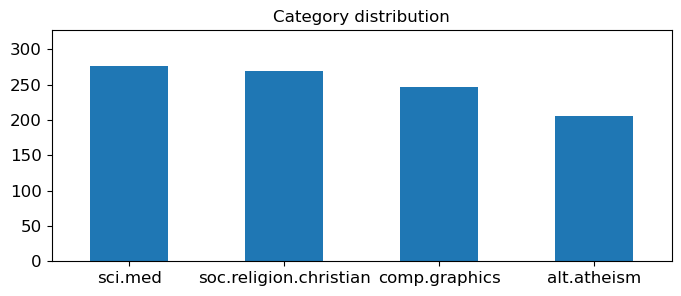

In [20]:
import matplotlib.pyplot as plt

# define a function to automate
def barchart(dataframe):
    upper_bound = max(dataframe.category_name.value_counts() + 50)
    return dataframe.category_name.value_counts().plot(kind = 'bar',
                                                       title = 'Category distribution',
                                                       ylim = [0, upper_bound], 
                                                       rot = 0, fontsize = 12, figsize = (8,3))

# example: plot barchart for X_sample
barchart(X_sample)

### >>> Exercise 8

<u>Task</u>: Do a side-by-side comparison of the distribution between the two datasets.

This could be done by merging two dataframes into one. But if the two datasets are large, merging datasets are computationally wasteful. So I think it is more proper to count first, write the result into new dataframes, merge them, then plot the result.

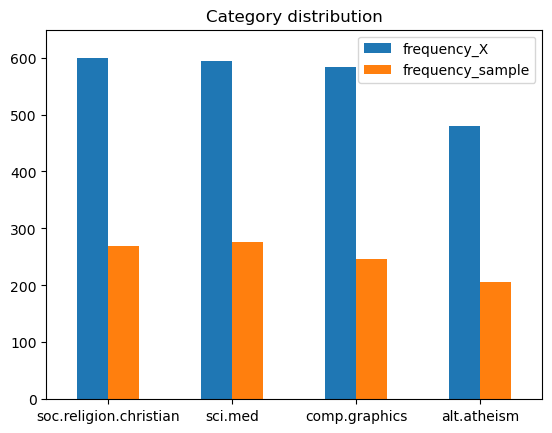

In [21]:
# Write counting results into dataframes
X_freq = X.category_name.value_counts().to_frame(name='frequency_X')
X_sample_freq = X_sample.category_name.value_counts().to_frame(name='frequency_sample')

# Merge the counting results
merged = pd.concat([X_freq, X_sample_freq], axis=1)

# plot the barchart
upper_bound = max(merged.max()) + 50
merged.plot(kind = 'bar',
            title = 'Category distribution',
            ylim = [0, upper_bound],
            rot = 0)

plt.show()

Some observations:

1. `value_counts()` returns a `pd.Series` (one dimensional data structure), so we need to change the series into dataframe representation by `to_frame()`, otherwise we can not merge them.

2. There are three methods for merging two dataframes in pandas: `merge()`, `join()`, and `concat()`. Their default way to merge dataframes are different, so one needs to adjust different parameters to get the same result. The following code generate the same merged data as we need:
  - `pd.concat([X_freq, X_sample_freq], axis=1)`
  - `X_freq.join(X_sample_freq)`
  - `X_freq.merge(X_sample_freq, left_index=True, right_index=True)`
  - `pd.merge(X_freq, X_sample_freq, left_index=True, right_index=True)`

### >>> Exercise 9

<u>Task</u>: Use the built-in analyzer provided by scikit-learn `CountVectorizer` to analyze the first record of our X dataframe.

The code is as following. The analyzer tokenized the text record.

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
analyze = count_vect.build_analyzer()

analyze(X.text[0])

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

### >>> Exercise 10

<u>Task</u>: Convert the dataframe X into the term-document matrix by `CountVectorizer`. Check the first 5 records with the first 100 terms. In the fifth record there should be two `1` occurred. The `1` in the beginning represents the term `00` with frequency 1; what word does the second `1` represent?

First, we convert the dataframe into term-document matrix and check if the statement is correct.

In [23]:
# learn the vocabulary and return document-term matrix
X_counts = count_vect.fit_transform(X.text)

# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

So yes, there are two `1`'s in the fifth record within the first 100 terms.

We can check which term the second `1` represents via `get_feature_names_out()` function. But for that I need to check the position where that `1` is in the array. Since the task request us to *verify*, checking by eyes isn't a good idea. Instead, I utilize numpy function to find it:

In [24]:
pos = np.where(X_counts[0:5, 0:100].toarray()[4] == 1)[0][1]
count_vect.get_feature_names_out()[pos]

'01'

So the word is `01`.

The code above needs some explanation. We are concerning about the fifth record from the (partial) matrix, so we take `X_counts[0:5, 0:100].toarray()[4]`. Given an array, the `np.where()` function can return the position of elements which fits the query condition; here the condition is "equal to one" (`== 1`). 

But `np.where()` returns a nested array -- here, it is `array([0, 37])`. So we need to do slice twice: first to get the position array, then get the second element that we are interested in.


### >>> Exercise 11

<u>Task</u>: Try to visualize the entire term-document matrix or just a sample of it as a heatmap efficiently.

The problem is *why* we need a heatmap here. At this moment we know not much about the (semi-)quantitative features of words in our dataset. So we need an overall picture about word distribution over documents, i.e. a *sample*.

The sparse matrix `X_counts` itself seems not allowing us to sample directly by build-in functions. Here I used a dull method: generating some random lists, and use those lists to generate a sample of `X_counts`. 

Because the document-word matrix is expected to be extremely sparse, I further *discard sample words* which are not occurred in sufficient amounts of the sample documents. 

The parameters could be further adjusted, see my code comments.

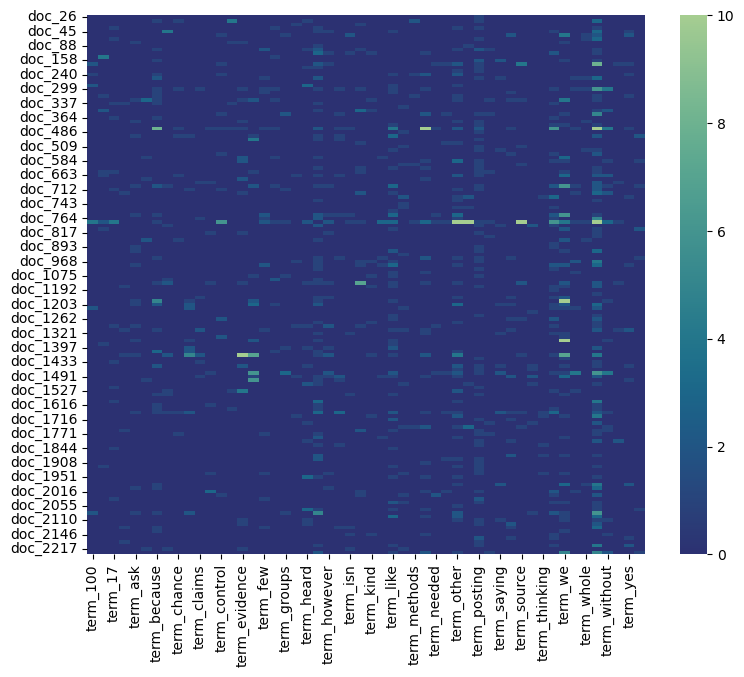

In [25]:
import seaborn as sns
import random

# precise access of entries in sparse matrix is slow; space-time trade-off
A = X_counts.toarray()

# set size for sampling; _x for terms, _y for docs
size_x = 2000
size_y = 150

# generate random integers for sampling
rand_x = np.array(random.sample(range(35788), size_x))
rand_x_sorted = rand_x[rand_x.argsort()]
rand_y = np.array(random.sample(range(2257), size_y))
rand_y_sorted = rand_y[rand_y.argsort()]

# find sample terms with document frequency *more than threshold*
threshold = 5 # deteremine the words need to be shown in how many docs
x_used = []
for j in rand_x_sorted:
    counter = 0
    for i in rand_y_sorted:
        if A[i,j] != 0: counter += 1
    if counter > threshold:
        x_used.append(j)

term_sample = [count_vect.get_feature_names_out()[i] for i in x_used]
doc_sample = [list(X.index)[i] for i in rand_y_sorted]

plot_x = ["term_"+str(i) for i in term_sample]
plot_y = ["doc_"+ str(i) for i in doc_sample]

# Generating sample points from X_counts for plotting
plot_z = []
for i in rand_y_sorted:
    temp = []
    for j in x_used:
        temp.append(A[i, j])
    plot_z.append(temp)

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="crest_r",
                 vmin=0, vmax=10)

plt.show()

The code, if not modified, can sample 2000 words and 150 documents. I used a reversed color palette. The word frequencies are normalized to $[0, 10]$.

Each time you run it you can see different random heat map. Nevertheless, the following observations should hold:
- Even we originally sampled a large bunch of words, the words survived (=occurred in multiple docs) are not much ($\approx 20$ words survived if the words are required to show in $>5$ sample docs).
- The heatmap is still quite sparse even I artificially make them to be dense.
- If a word is used in the most of sample docs (shown as bright columns), that word usually will be also very common in general: articles, auxiliary verbs, conjunctions, pronouns, etc. We need stopwords.

### >>> Exercise 12

<u>Task</u>: Using PCA to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

The following code should successfully generate 3 different views of the PCA result.

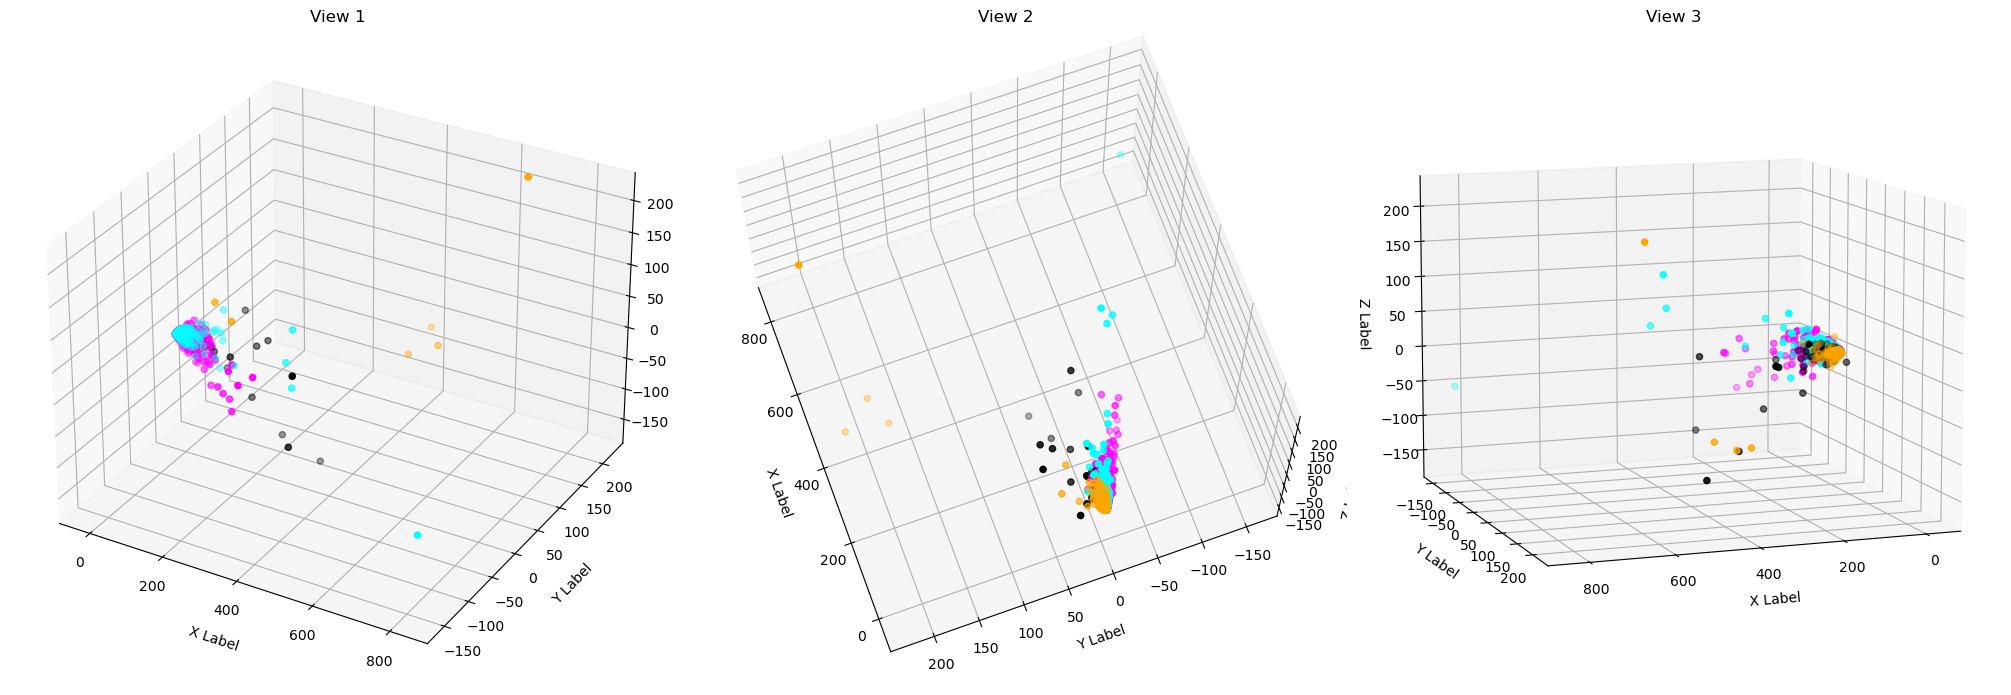

In [26]:
from sklearn.decomposition import PCA

X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

col = ['cyan', 'magenta', 'orange', 'black']

# setting plotting canvas
fig = plt.figure(figsize = (20,15), constrained_layout=True)

# setting subplots 
ax1 = fig.add_subplot(131, projection="3d")
ax2 = fig.add_subplot(132, projection="3d")
ax3 = fig.add_subplot(133, projection="3d")

# setting camera position
ax2.view_init(70, 160)
ax3.view_init(10, 70)

# plotting scatter dots
for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax1.scatter(xs, ys, zs, c = c, marker='o')
    ax2.scatter(xs, ys, zs, c = c, marker='o')
    ax3.scatter(xs, ys, zs, c = c, marker='o')

ax1.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax2.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax3.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)

ax1.set_title('View 1')
ax1.set_xlabel('\nX Label')
ax1.set_ylabel('\nY Label')
ax1.set_zlabel('\nZ Label')

ax2.set_title('View 2')
ax2.set_xlabel('\nX Label')
ax2.set_ylabel('\nY Label')
ax2.set_zlabel('\nZ Label')

ax3.set_title('View 3')
ax3.set_xlabel('\nX Label')
ax3.set_ylabel('\nY Label')
ax3.set_zlabel('\nZ Label')


plt.show()

In the code I changed the color configuration. Coral and orange, (dark) blue and black are both similar color pairs, so it is not a good idea. 

I change the camera position by `view_init()` function, which accepts three parameters: `elev`, `azim`, and `roll`.
- `elev` is the counterclockwise elevation angle between camera and xy-plane.
- `azim` is the counterclockwise azimuth angle between camera and positive x-axis.
- `roll` is the counterclockwise rotation angle of the viewing plane itself. (I did not use it; the default value is 0)

By this result we can see that PCA in 3 dimensions still does not separete the data into clear clusters. Most of the points are really close to the original point, which suggests those texts do not have a great loading on any of the 3 principle components, i.e. the most of the data are *not discernable enough* under (linear) PCA.

To prove my point, I have drawn close up graphs below:

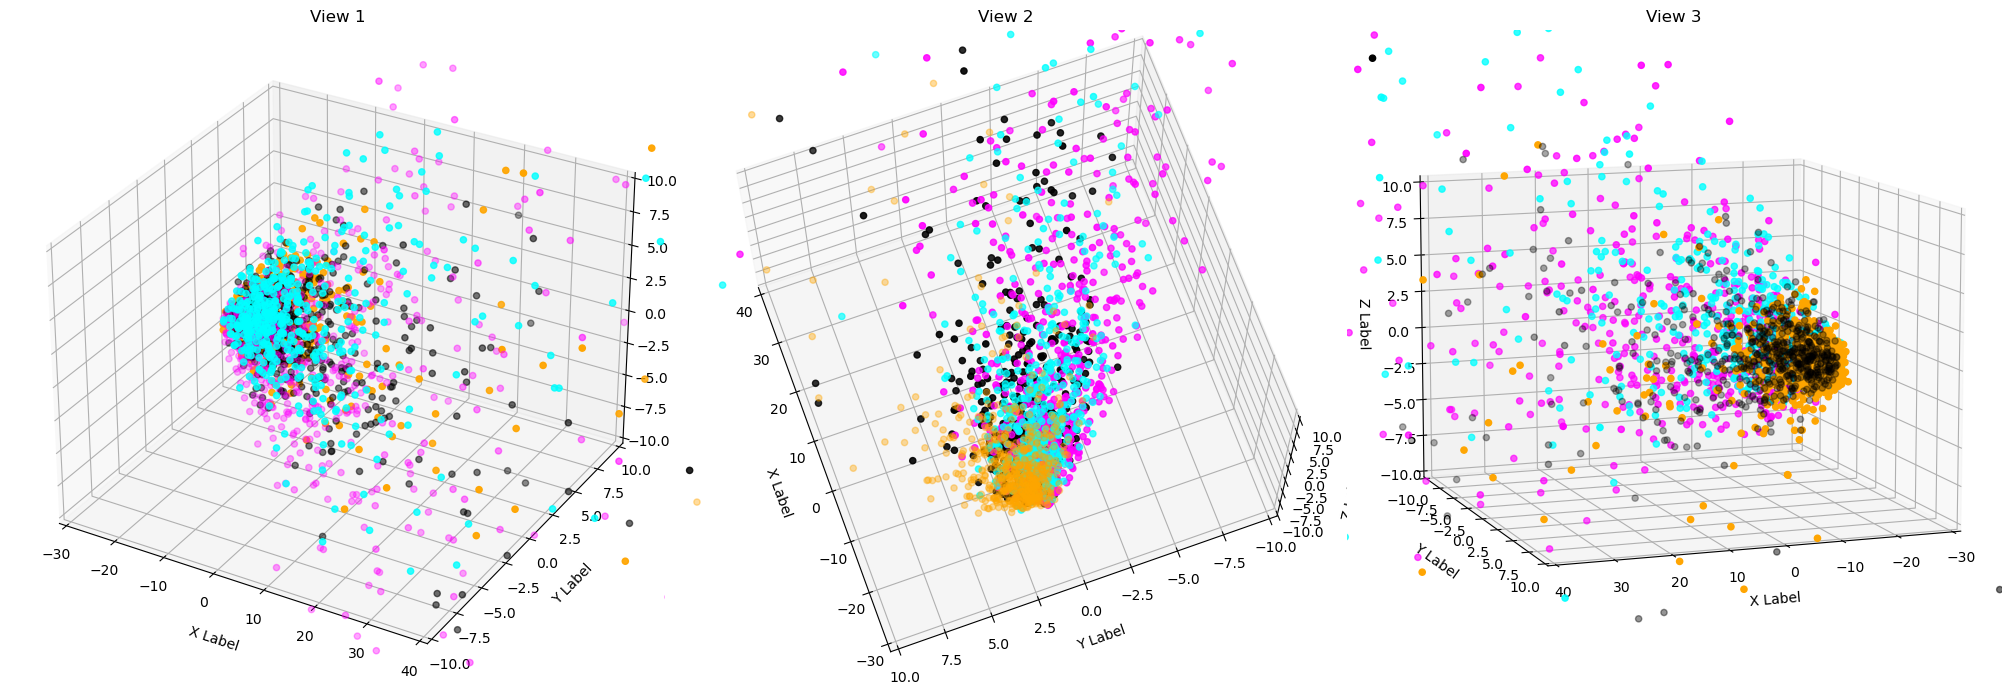

In [27]:
# setting plotting canvas
fig = plt.figure(figsize = (20,15), constrained_layout=True)

ax1 = fig.add_subplot(131, projection="3d")
ax2 = fig.add_subplot(132, projection="3d")
ax3 = fig.add_subplot(133, projection="3d")

ax2.view_init(70, 160)
ax3.view_init(10, 70)

# room in by setting scale limits
ax1.set_xlim(-30, 40)
ax1.set_ylim(-10, 10)
ax1.set_zlim(-10, 10)
ax2.set_xlim(-30, 40)
ax2.set_ylim(-10, 10)
ax2.set_zlim(-10, 10)
ax3.set_xlim(-30, 40)
ax3.set_ylim(-10, 10)
ax3.set_zlim(-10, 10)

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax1.scatter(xs, ys, zs, c = c, marker='o')
    ax2.scatter(xs, ys, zs, c = c, marker='o')
    ax3.scatter(xs, ys, zs, c = c, marker='o')

ax1.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax2.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax3.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)

ax1.set_title('View 1')
ax1.set_xlabel('\nX Label')
ax1.set_ylabel('\nY Label')
ax1.set_zlabel('\nZ Label')

ax2.set_title('View 2')
ax2.set_xlabel('\nX Label')
ax2.set_ylabel('\nY Label')
ax2.set_zlabel('\nZ Label')

ax3.set_title('View 3')
ax3.set_xlabel('\nX Label')
ax3.set_ylabel('\nY Label')
ax3.set_zlabel('\nZ Label')


plt.show()

### >>> Exercise 13

<u>Task</u>: Use plotly to generate a visualization of aggregate frequency of first 300 terms.

The following code should successfully generate a visualization via plotly.

In [28]:
import plotly.express as px

# aggregate frequency
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

data = {
    'Terms': count_vect.get_feature_names_out()[:300],
    'Frequency': term_frequencies[:300]
}

# plotting; color by frequency, not terms
fig = px.bar(data, x='Terms', y='Frequency', title='Term Frequencies', 
             color='Frequency', color_continuous_scale='inferno_r')

# rotate x-axis labels to make them clear
fig.update_layout(xaxis_tickangle=-45)

fig.show()

### >>> Exercise 14

<u>Task</u>: Efficiently reduce the number of terms that is visualized.

One clear observation is that most of the 300 words shown above does only showed few times. So it is reasonable to set a threshold for word frequency, and only let words with frequency above it to be shown.

We can query the words above threshold with powerful `query()` method!

In [29]:
# setting threshold
freq_bound = 5

data = pd.DataFrame({
    'Terms': count_vect.get_feature_names_out()[:300],
    'Frequency': term_frequencies[:300]
})

# reducing data via query
data_reduced = data.query("Frequency >= @freq_bound")

# plotting
fig = px.bar(data_reduced, x='Terms', y='Frequency', title='Term Frequencies', 
             color='Frequency', color_continuous_scale='inferno_r')

fig.update_layout(xaxis_tickangle=-45)

fig.show()

### >>> Exercise 15

<u>Task</u>: Attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. 

It would be much easier to sort via `nlargest()` method for dataframes, which can sort out rows with first $n$ largest value in a specific column. If we plot all ~36000 words in one chart it would be extremely computationally intensive. `nlargest()` also help us to reduce the number of words.

Even if I only plotted 50 words, the long tail distribution is still shown. The "tail" of the full distribution would be much longer.

In [30]:
data = pd.DataFrame(
    {'Terms': count_vect.get_feature_names_out(),
     'Frequency': term_frequencies
    })

# sorting and reducing the data
data_sorted = data.nlargest(50, 'Frequency') 

# plot
fig = px.bar(data_sorted, x='Terms', y='Frequency', title='Term Frequencies', 
             color='Frequency', color_continuous_scale='inferno_r', text_auto=True)

fig.update_traces(textposition = "outside")
fig.update_layout(xaxis_tickangle=-45)

fig.show()

### >>> Exercise 16

<u>Task</u>: Try to generate the binarization using the `category_name` column instead. Does it work?

It works.

In [31]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name) # learn the labels needed
X['bin_category'] = mlb.transform(X['category_name']).tolist() # binarization
X[0:9]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name  bin_category  
0           comp.graphics  [0, 1, 0, 0]  
1           comp.graphics  [0, 1, 0, 0]  
2  soc.religion.christian  [0, 0, 0, 1]  
3  soc.religion.christian  [0, 0, 0, 1]  
4  soc.religion.christian  [0, 0, 0, 1]  
5  soc.religion.christian  [0, 0, 0, 1]  
6  soc.religion.christian  [0, 0, 0, 1]  
7                 sci.med  [0, 0, 1, 0]  
8                 sci.med  [0, 0, 1, 0]

From above result one can see the `bin_category` shows the binarization process succeeded. 

This exercise *probably* wants us to do the task with `mlb.fit(X.category)`. In that case binarization does not work, and would produce error `FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison ...`. 

The binarization does not work because `mlb.transform` need to use the labels learned by `mlb.fit` for elementwise comparison. The error occurs because the `category` labels and the `category_name` labels are of different types (one in `int64` and one in `str`).

## Part 2: Exploring the new dataset

The codes in part 2 and 3 are independent from part 1.

### 1. Data Preparation & transformation

The dataset we need to use is [Sentiment Labelled Sentences](https://archive.ics.uci.edu/dataset/331/sentiment+labelled+sentences). According to the `readme.txt`,
- The dataset contains sentenses from 3 different websites, stored in separate files. Each contains `1000` sentences.
- Each dataset should be considered to have two labels, `sentense` and `score`. In the file, `sentense` and `score` are seperated by `\t` and two different data are separated by `\n`.
- The `score` of each instances is either `0` (for negative emotions) or `1` (for positive emotions).

And we are required to combine those files; which means we need a new label to mark out the source of sentenses, say `source`.

In [32]:
import pandas as pd

sources = ['amazon_cells', 'imdb', 'yelp']

# combine three files into one
with open('sentiment_dataset.txt', 'w', encoding="utf-8") as outfile:
    for name in sources:
        with open('sentiment_dataset/' + name + '_labelled.txt', 'r', encoding="utf-8") as infile:
            for line in infile:
                line = line.split('\n')[0]
                line += '\t' + name + '\n'
                outfile.write(line)

# loading the dataset
dataset = pd.read_csv('sentiment_dataset.txt', names=['sentences'], sep='/n', engine='python')

# separating labels by \t
# split('\t') would generate arrays of the form [sentences, score, source]
dataset['score'] = dataset.sentences.apply(lambda t: t.split('\t')[1])
dataset['source'] = dataset.sentences.apply(lambda t: t.split('\t')[2])
dataset['sentences'] = dataset.sentences.apply(lambda t: t.split('\t')[0])

# scores are currently strings; change to int
dataset['score'] = dataset.score.apply(lambda t: int(t))

display(dataset)

sentences  score        source
0     So there is no way for me to plug it in here i...      0  amazon_cells
1                           Good case, Excellent value.      1  amazon_cells
2                                Great for the jawbone.      1  amazon_cells
3     Tied to charger for conversations lasting more...      0  amazon_cells
4                                     The mic is great.      1  amazon_cells
...                                                 ...    ...           ...
2995  I think food should have flavor and texture an...      0          yelp
2996                           Appetite instantly gone.      0          yelp
2997  Overall I was not impressed and would not go b...      0          yelp
2998  The whole experience was underwhelming, and I ...      0          yelp
2999  Then, as if I hadn't wasted enough of my life ...      0          yelp

[3000 rows x 3 columns]

The displayed dataset indicates I have imported the database successfully.

### 2. Data cleansing

This dataset is a sample dataset from a completed analysis, and the distributor decleared no missing values. However, double check is still in need.

First, we will check if there are missing values.

In [33]:
import helpers.data_mining_helpers as dmh
import numpy as np

# Eliminating invalid forms of missing values; see exercise 5 in part 1
dataset.replace(['NaN', 'None', 'N/A', 'NA', ''], np.nan, inplace=True)
dataset.replace('^\s*$', np.nan, regex=True, inplace=True) 

dataset.isnull().apply(lambda x: dmh.check_missing_values(x))

sentences                               score  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                               source  
0  The amoung of missing records is:   
1                                   0

This indicates that there is indeed no missing value.

Second, we will check if there are duplicate data.

In [34]:
sum(dataset.duplicated())

17

Let us see those instance of duplicate values:

In [35]:
dataset[dataset.duplicated(keep=False)]

sentences  score        source
18                                        Works great!.      1  amazon_cells
179   If you like a loud buzzing to override all you...      0  amazon_cells
180                             Don't buy this product.      0  amazon_cells
187                                       Great phone!.      1  amazon_cells
262                                        Works great.      1  amazon_cells
285                                       Great phone!.      1  amazon_cells
290                                        Great Phone.      1  amazon_cells
392                               This is a great deal.      1  amazon_cells
402                    Excellent product for the price.      1  amazon_cells
407                                        Works great.      1  amazon_cells
446                                       Does not fit.      0  amazon_cells
524                                       Works great!.      1  amazon_cells
543                             Don't buy this product.      0  amazon_cells
647                                        Great phone.      1  amazon_cells
744   If you like a loud buzzing to override all you...      0  amazon_cells
748                                       Does not fit.      0  amazon_cells
778                               This is a great deal.      1  amazon_cells
792                                        Great Phone.      1  amazon_cells
892                    Excellent product for the price.      1  amazon_cells
896                                        Great phone.      1  amazon_cells
1090                   Definitely worth checking out.        1          imdb
1125                                            10/10        1          imdb
1363                   Definitely worth checking out.        1          imdb
1572                                 Not recommended.        0          imdb
1585                                 Not recommended.        0          imdb
1788                                            10/10        1          imdb
2334                                 I love this place.      1          yelp
2380                                   I won't be back.      0          yelp
2383                             The food was terrible.      0          yelp
2505                  I would not recommend this place.      0          yelp
2814                                 I love this place.      1          yelp
2816                             The food was terrible.      0          yelp
2843                                   I won't be back.      0          yelp
2846                  I would not recommend this place.      0          yelp

There is a *bad signal* here. From the instances above, one can see case like `187` and `290`: for our purpose, these two should be think as duplicated, but they have an insignificant difference (punctuation marks). `duplicated()` is *insensitive* to this! This indicates that one probably should do this step *after* some proper treatment.

But anyway, let us delete those obvious case first:

In [36]:
dataset.drop_duplicates(keep='first', inplace=True)
print(dataset.shape)

(2983, 3)


`shape` tell us the duplicated 17 rows are deleted successfully.

One idea I have for further duplication detection is simply strip those punctuation marks out by build in functions in Python. But if we do it directly, there might be a conflict with `nltk` or `CountVectorization` features for nature language. (e.g. `you're` becoming `youre` and thus could not be excluded as stopwords). A solution is to send those treated sentences to a new column:

In [37]:
import string
dataset['sentences_t'] = dataset.sentences.apply(lambda t: t.translate(str.maketrans('', '', string.punctuation)))
sum(dataset.duplicated(['sentences_t','score','source']))

4

So there are further four duplications. Let us check:

In [38]:
dataset[dataset.duplicated(['sentences_t','score','source'], keep=False)]

sentences  score        source            sentences_t
18               Works great!.      1  amazon_cells            Works great
94    Dont waste your money...      0  amazon_cells  Dont waste your money
187              Great phone!.      1  amazon_cells            Great phone
262               Works great.      1  amazon_cells            Works great
268   Don't waste your money!.      0  amazon_cells  Dont waste your money
647               Great phone.      1  amazon_cells            Great phone
2446         Will not be back.      0          yelp       Will not be back
2744         Will not be back!      0          yelp       Will not be back

There are no further issues, so let us delete them:

In [39]:
dataset.drop_duplicates(['sentences_t','score','source'], keep='first', inplace=True)
print(dataset.shape)

(2979, 4)


### 3. Data preprocessing

#### 3.1 Sampling

Let us take a sample of the dataset.

In [40]:
ds_sample = dataset.sample(n=1000,random_state=72)
display(ds_sample)

sentences  score        source  \
726   This case has passed the one year mark and whi...      1  amazon_cells   
2013  I tried the Cape Cod ravoli, chicken,with cran...      1          yelp   
2590                 Great place fo take out or eat in.      1          yelp   
1831                       See both films if you can.        1          imdb   
200   The color is even prettier than I thought it w...      1  amazon_cells   
...                                                 ...    ...           ...   
580   It works great with a car charger, especially ...      1  amazon_cells   
716   It quit working after I'd used it for about 18...      1  amazon_cells   
1481  And, FINALLY, after all that, we get to an end...      0          imdb   
77                         This is a great little item.      1  amazon_cells   
2635               We were promptly greeted and seated.      1          yelp   

                                            sentences_t  
726   This case has passed the one year mark and whi...  
2013  I tried the Cape Cod ravoli chickenwith cranbe...  
2590                  Great place fo take out or eat in  
1831                        See both films if you can    
200   The color is even prettier than I thought it w...  
...                                                 ...  
580   It works great with a car charger especially i...  
716   It quit working after Id used it for about 18 ...  
1481  And FINALLY after all that we get to an ending...  
77                          This is a great little item  
2635                We were promptly greeted and seated  

[1000 rows x 4 columns]

Now, for our purpose, we would like to check if the sample is similar to the population in `score` and `source`. (This is also a reproduction of **Exercise 8**.)

For `score`:

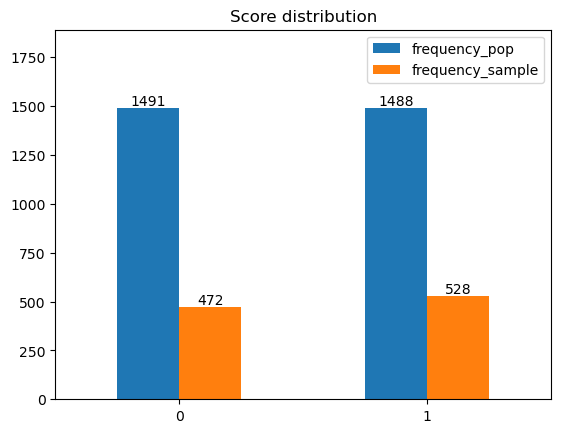

In [41]:
import matplotlib.pyplot as plt

# Write counting results into dataframes
ds_score = dataset.score.value_counts().to_frame(name='frequency_pop')
ds_sample_score = ds_sample.score.value_counts().to_frame(name='frequency_sample')

# Merge the counting results
merged = pd.concat([ds_score, ds_sample_score], axis=1)

# plot the barchart
upper_bound = max(merged.max()) + 400

ax = merged.plot.bar(title = 'Score distribution',
                     ylim = [0, upper_bound],
                     rot = 0)

for container in ax.containers:
    ax.bar_label(container)

plt.show()

For `source`:

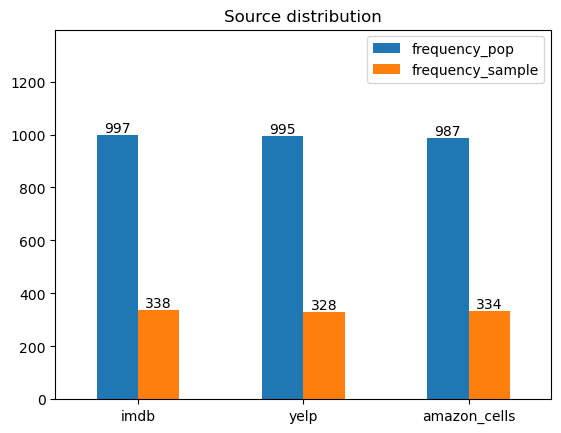

In [42]:
# Write counting results into dataframes
ds_src = dataset.source.value_counts().to_frame(name='frequency_pop')
ds_sample_src = ds_sample.source.value_counts().to_frame(name='frequency_sample')

# Merge the counting results
merged = pd.concat([ds_src, ds_sample_src], axis=1)

# plot the barchart
upper_bound = max(merged.max()) + 400

ax = merged.plot.bar(title = 'Source distribution',
                     ylim = [0, upper_bound],
                     rot = 0)

for container in ax.containers:
    ax.bar_label(container)

plt.show()

So this sample and the population are roughly with simlar distribution for both `score` and `source`.

#### 3.2 Feature Creation & Subset Selection

Let us use `CountVectorizer` to tokenize the dataset and transform it into term-document matrix:

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(stop_words='english') # set stopwords
dataset_counts = count_vect.fit_transform(dataset.sentences) # learn the vocabulary and return term-doc matrix
print(dataset_counts.shape)
print(dataset_counts[0])

(2979, 4896)
  (0, 4754)	1
  (0, 3217)	1
  (0, 4566)	1
  (0, 959)	1


From above we have seen the transformation succeeded. The matrix has 2979 rows (=documents) and 4896 columns (=terms). Notice that I have used build-in *English stopword list* of sklearn.

Let us further see the first sentense tokenized:

In [44]:
analyze = count_vect.build_analyzer()
analyze(dataset.sentences[0])

['way', 'plug', 'unless', 'converter']

The original "So there is no way for me to plug it in here in the US unless I go by a converter." The words not shown are all in the [stopword list](https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/feature_extraction/_stop_words.py) and is excluded.

The first 10 terms are:

In [45]:
count_vect.get_feature_names_out()[0:10]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

Let us reproduce **exercise 10**. First, let us look at the frequencies of the first 100 terms in the first 5 documents:

In [46]:
dataset_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

So only in the fourth document there is a term with nonzero frequency. Let us see what is the term:

In [47]:
pos = np.where(dataset_counts[0:5, 0:100].toarray()[3] == 1)[0][0]
count_vect.get_feature_names_out()[pos]

'45'

Now we can draw a heatmap similar to **exercise 11**:

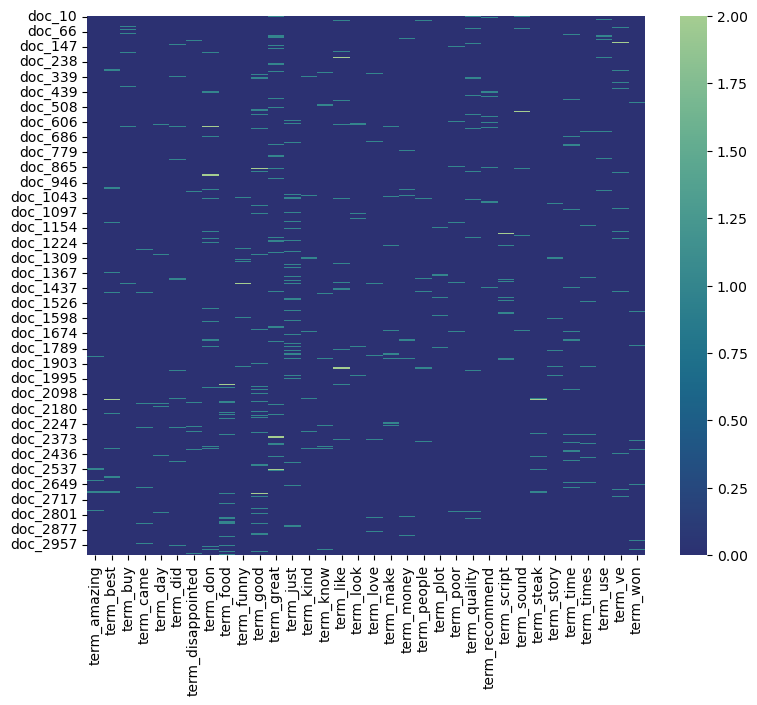

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import random

# make it faster
A = dataset_counts.toarray()

# set size for sampling; _x for terms, _y for docs
size_x = 2000
size_y = 500

# generate random integers for sampling
rand_x = np.array(random.sample(range(4896), size_x))
rand_x_sorted = rand_x[rand_x.argsort()]
rand_y = np.array(random.sample(range(2979), size_y))
rand_y_sorted = rand_y[rand_y.argsort()]

# find sample terms used *more than once* in sample docs
# speed bottleneck
threshold = 5 # deteremine the words need to be shown in how many docs
x_used = []
for j in rand_x_sorted:
    counter = 0
    for i in rand_y_sorted:
        if A[i,j] != 0: counter += 1
    if counter > threshold:
        x_used.append(j)

term_sample = [count_vect.get_feature_names_out()[i] for i in x_used]
doc_sample = [list(dataset.index)[i] for i in rand_y_sorted]

plot_x = ["term_"+str(i) for i in term_sample]
plot_y = ["doc_"+ str(i) for i in doc_sample]

# Generating sample points from X_counts for plotting
plot_z = []
for i in rand_y_sorted:
    temp = []
    for j in x_used:
        temp.append(A[i, j])
    plot_z.append(temp)

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="crest_r",
                 vmin=0, vmax=2)

plt.show()

Here I sampled 2000 terms and 500 words. Terms are shown only if they occurred in $>5$ sampled docs. The word frequencies are normalized to $[0, 2]$.

Again each time you run it you get different heatmap (it is randomly generated). But the following observation should hold:
- Words with relatively high probability of occurence in the sample docs are usually for evaluation (e.g. "good", "nice", "bad") and topics (e.g. "film", "foods", "product"). This is a good news.
- But there are also some "words" which are just fragments of (supposed) stopwords, for example, "ve" is just "have" from "I've" etc., "ll" is just "will" from "I'll" etc., and "don" is just from "don't". Also strangely the stopword list has "do" but no "did". This is a bad news -- indicate that we *may need to modify the stopword list*.
- Another bad news: there are less negative terms shown compared to positive terms. This probably because negative comments are usually written with negations ("no", "not" etc.) which are stopwords. This indicates conversely that we may need to *give up using stopwords*.

The issue for stopwords would be discussed in part 3, section 3.

#### 3.3 Dimensionality Reduction

Now, let us see if PCA algorithm separates data well in this dataset (A reproduction of **exercise 12**). First we look at `source`:

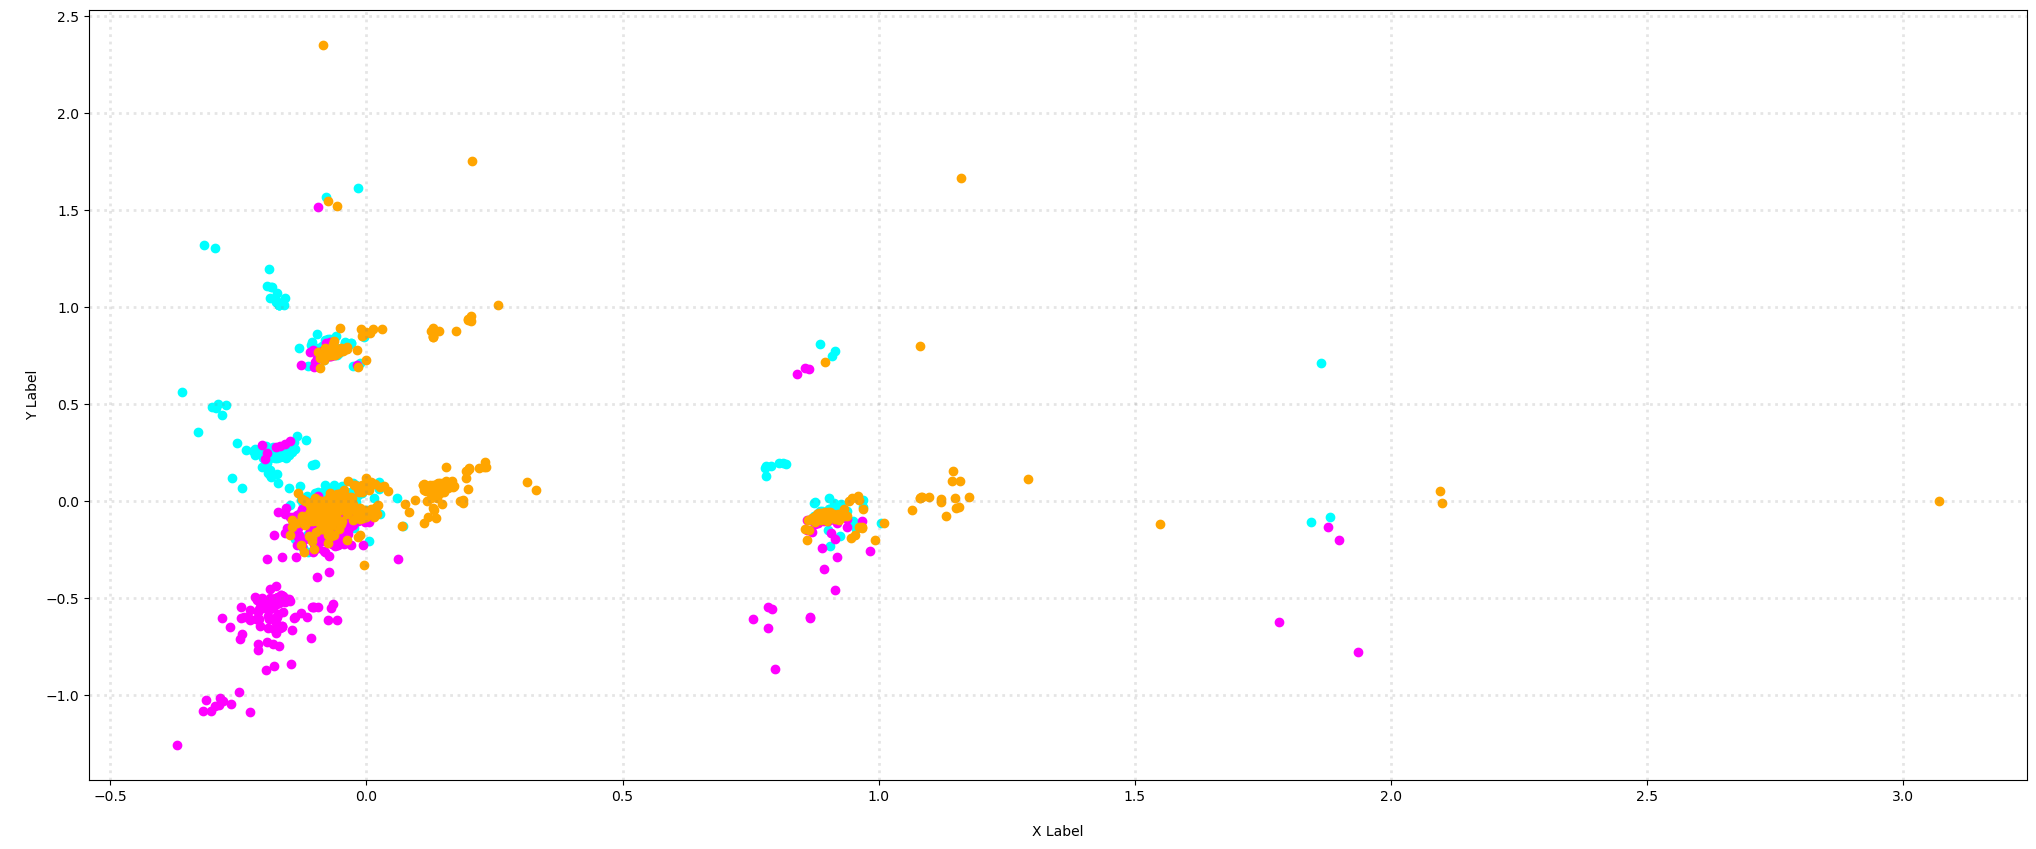

In [49]:
from sklearn.decomposition import PCA

ds_reduced = PCA(n_components = 2).fit_transform(dataset_counts.toarray())

col = ['cyan', 'magenta', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, source in zip(col, sources):
    xs = ds_reduced[dataset['source'] == source].T[0]
    ys = ds_reduced[dataset['source'] == source].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

It doesn't separate well! But, however, there seems to be a non-linear pattern: there are some small groups, with each group one *seems* to be able to separate the three sources. Let us see 3D PCA: 

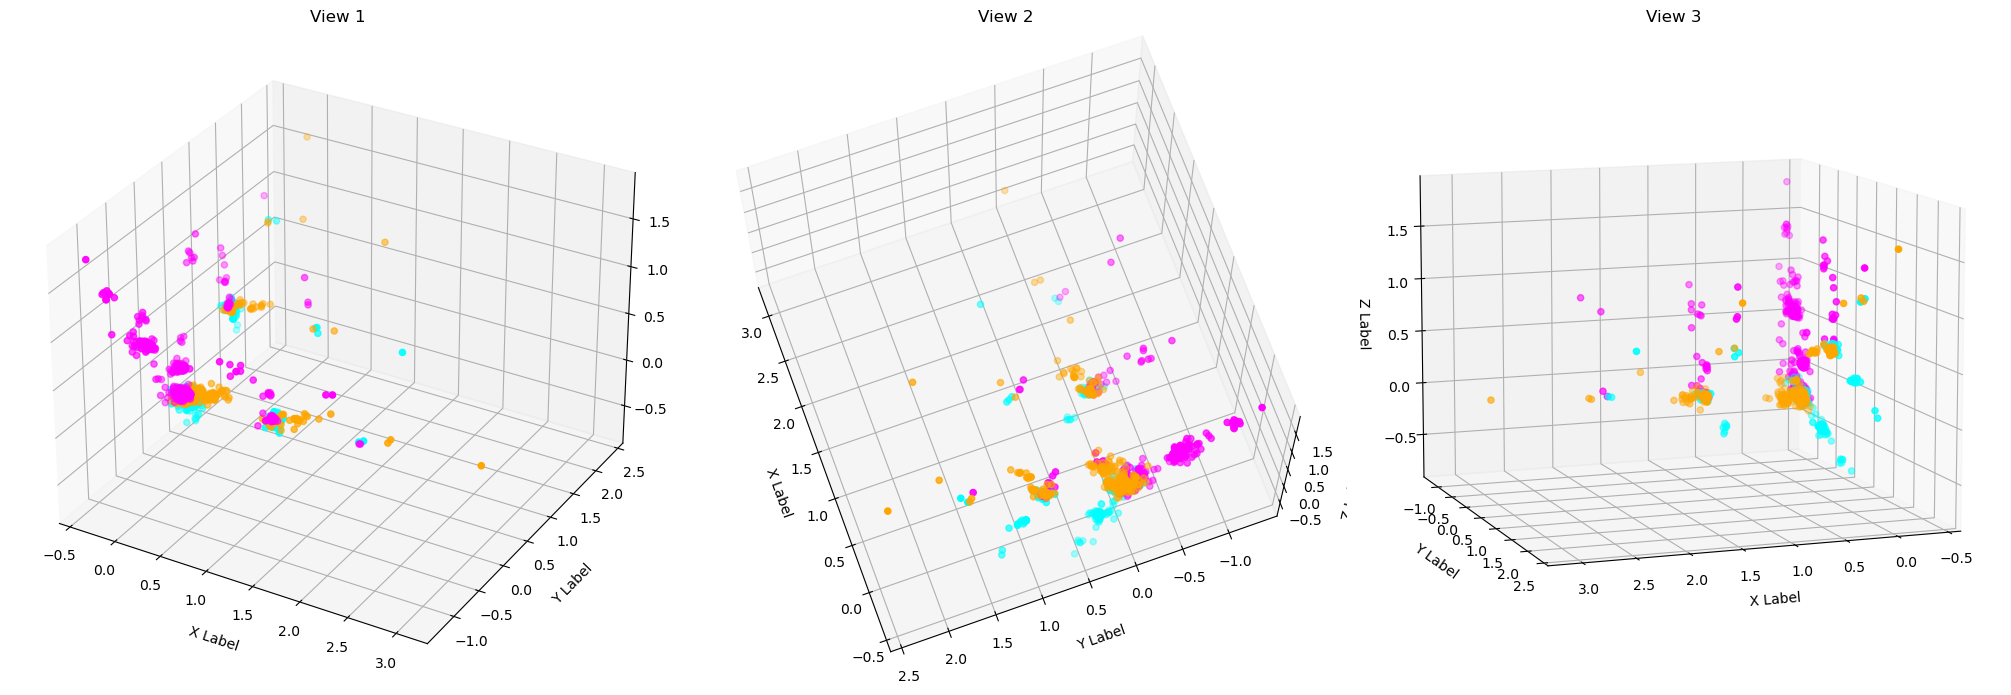

In [50]:
ds_reduced = PCA(n_components = 3).fit_transform(dataset_counts.toarray())

col = ['cyan', 'magenta', 'orange']

# setting plotting canvas
fig = plt.figure(figsize = (20,15), constrained_layout=True)

# setting subplots 
ax1 = fig.add_subplot(131, projection="3d")
ax2 = fig.add_subplot(132, projection="3d")
ax3 = fig.add_subplot(133, projection="3d")

# setting camera position
ax2.view_init(70, 160)
ax3.view_init(10, 70)

# plotting scatter dots
for c, source in zip(col, sources):
    xs = ds_reduced[dataset['source'] == source].T[0]
    ys = ds_reduced[dataset['source'] == source].T[1]
    zs = ds_reduced[dataset['source'] == source].T[2]
    
    ax1.scatter(xs, ys, zs, c = c, marker='o')
    ax2.scatter(xs, ys, zs, c = c, marker='o')
    ax3.scatter(xs, ys, zs, c = c, marker='o')

ax1.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax2.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax3.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)

ax1.set_title('View 1')
ax1.set_xlabel('\nX Label')
ax1.set_ylabel('\nY Label')
ax1.set_zlabel('\nZ Label')

ax2.set_title('View 2')
ax2.set_xlabel('\nX Label')
ax2.set_ylabel('\nY Label')
ax2.set_zlabel('\nZ Label')

ax3.set_title('View 3')
ax3.set_xlabel('\nX Label')
ax3.set_ylabel('\nY Label')
ax3.set_zlabel('\nZ Label')

plt.show()

So 3D PCA can also not separate the data well and the plot pattern is similar, which is expected: simple PCA cannot separate data with non-linear separation pattern. But for sure the data is quite separable.

Second we look at `score`:

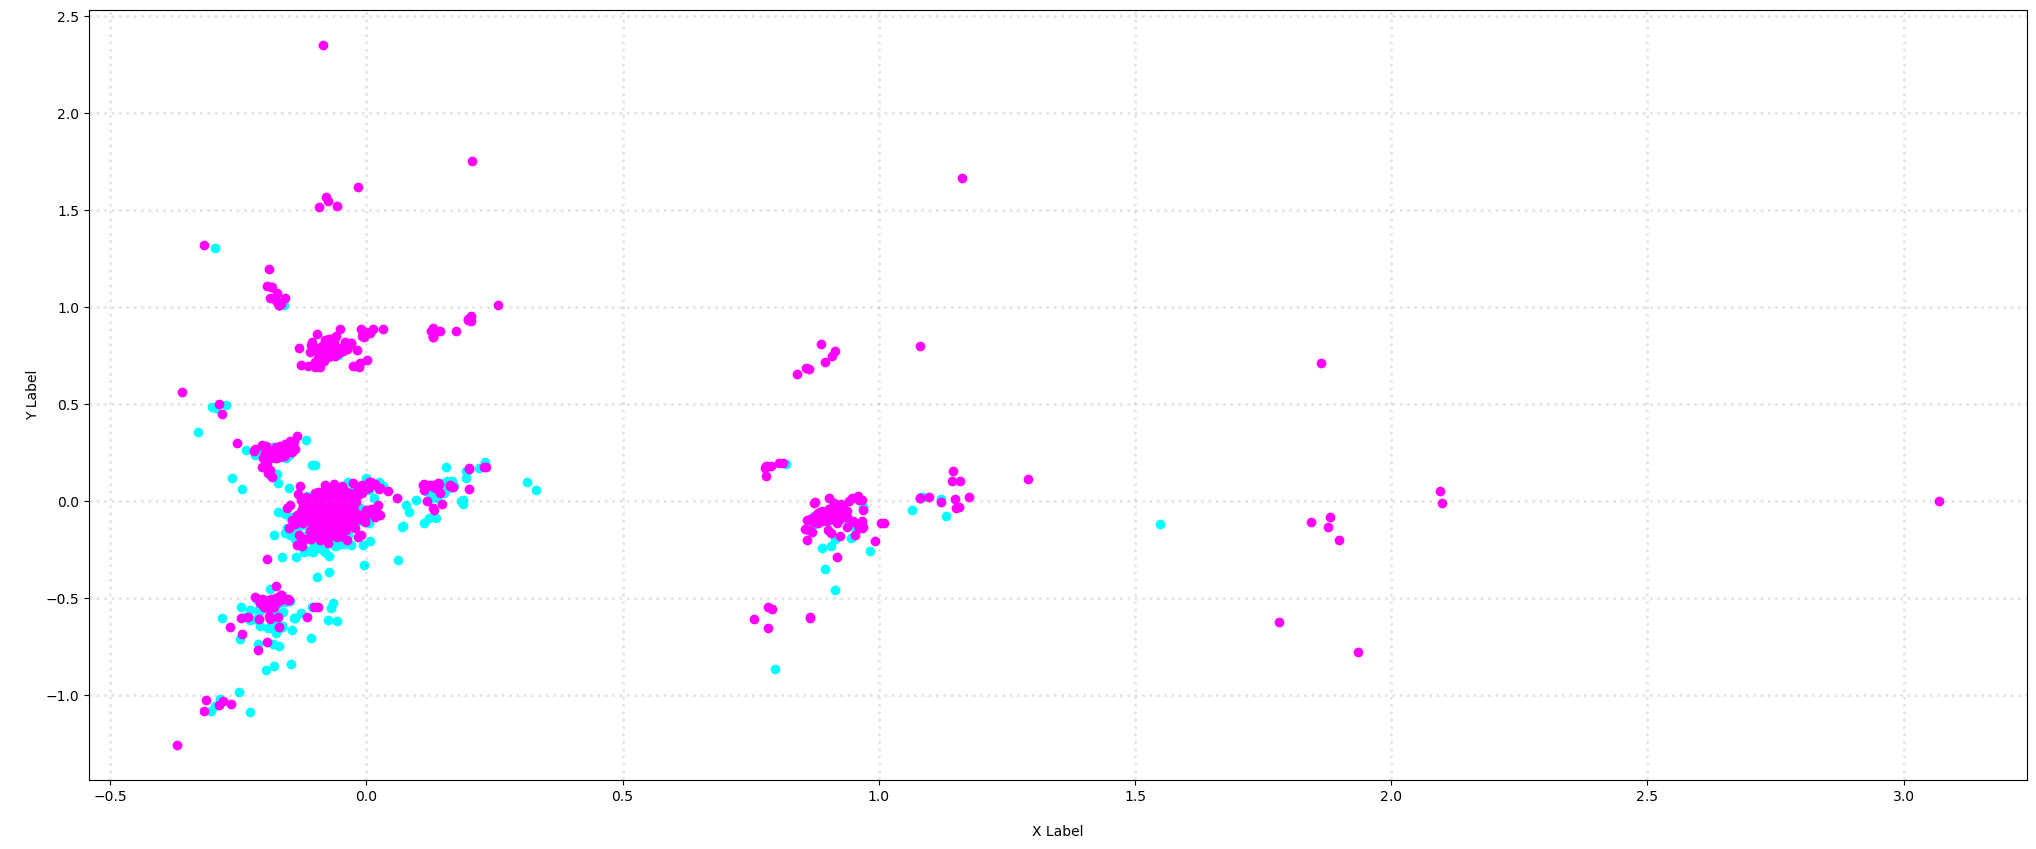

In [51]:
ds_reduced = PCA(n_components = 2).fit_transform(dataset_counts.toarray())

col = ['cyan', 'magenta']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

scores = [0, 1]
for c, score in zip(col, scores):
    xs = ds_reduced[dataset['score'] == score].T[0]
    ys = ds_reduced[dataset['score'] == score].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

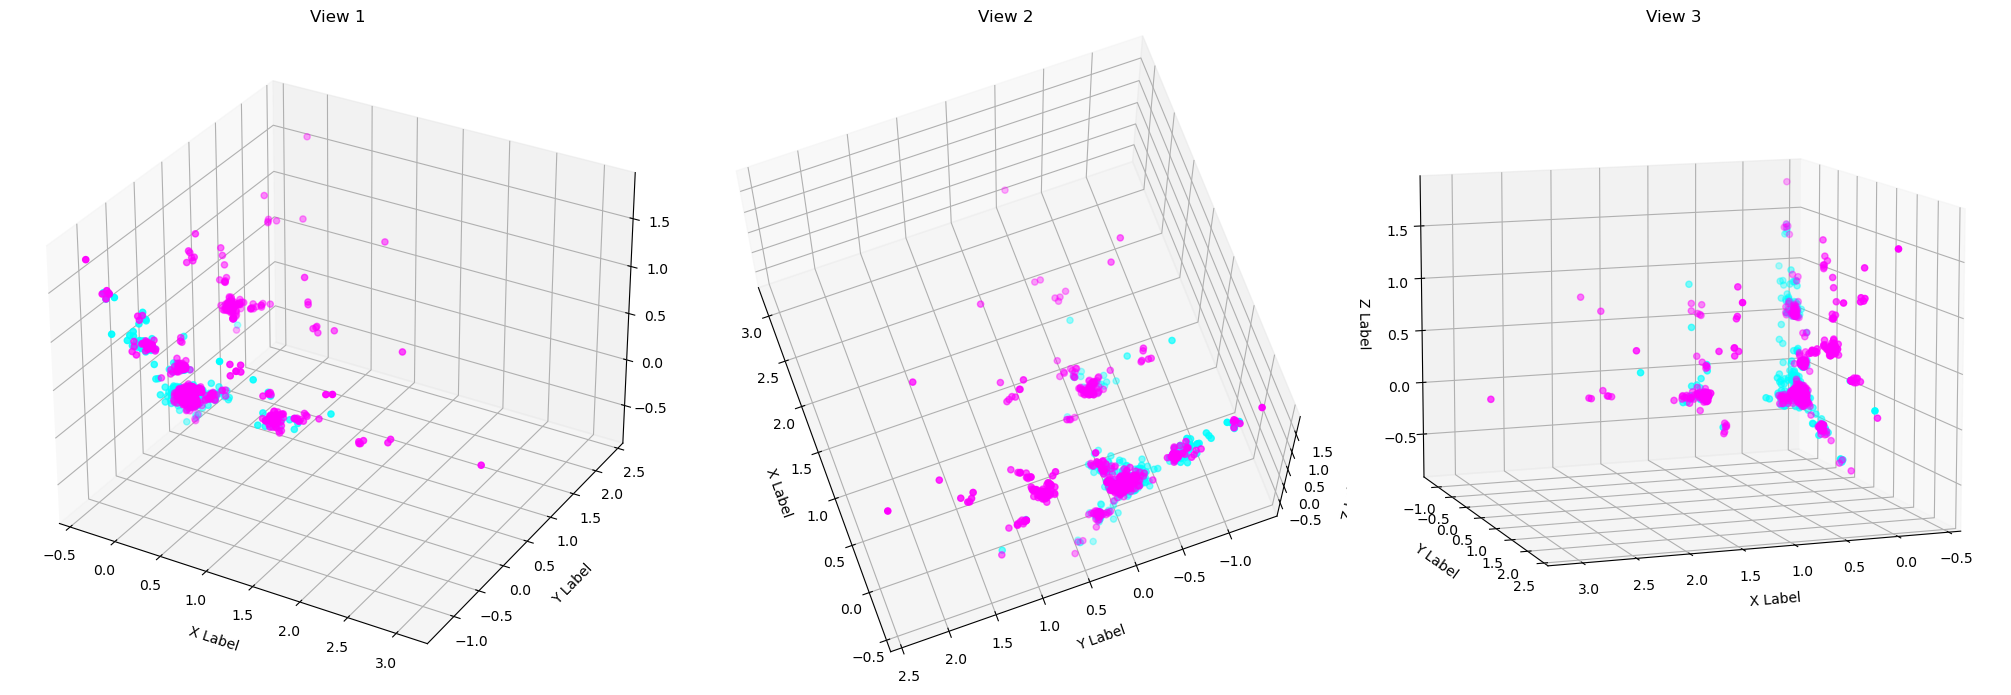

In [52]:
ds_reduced = PCA(n_components = 3).fit_transform(dataset_counts.toarray())

col = ['cyan', 'magenta']

# setting plotting canvas
fig = plt.figure(figsize = (20,15), constrained_layout=True)

# setting subplots 
ax1 = fig.add_subplot(131, projection="3d")
ax2 = fig.add_subplot(132, projection="3d")
ax3 = fig.add_subplot(133, projection="3d")

# setting camera position
ax2.view_init(70, 160)
ax3.view_init(10, 70)

# plotting scatter dots
scores = [0, 1]
for c, score in zip(col, scores):
    xs = ds_reduced[dataset['score'] == score].T[0]
    ys = ds_reduced[dataset['score'] == score].T[1]
    zs = ds_reduced[dataset['score'] == score].T[2]
    
    ax1.scatter(xs, ys, zs, c = c, marker='o')
    ax2.scatter(xs, ys, zs, c = c, marker='o')
    ax3.scatter(xs, ys, zs, c = c, marker='o')

ax1.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax2.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax3.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)

ax1.set_title('View 1')
ax1.set_xlabel('\nX Label')
ax1.set_ylabel('\nY Label')
ax1.set_zlabel('\nZ Label')

ax2.set_title('View 2')
ax2.set_xlabel('\nX Label')
ax2.set_ylabel('\nY Label')
ax2.set_zlabel('\nZ Label')

ax3.set_title('View 3')
ax3.set_xlabel('\nX Label')
ax3.set_ylabel('\nY Label')
ax3.set_zlabel('\nZ Label')

plt.show()

So PCA also cannot separate data with different score well; it is not even clear if the data is very separable.

#### 3.4 Attribute Transformation / Aggregation

Now, let us see the word frequency distribution over all documents (A reproduction of **exercise 15**):

In [53]:
import plotly.express as px

# aggregate frequency
term_frequencies = np.asarray(dataset_counts.sum(axis=0))[0]

data = pd.DataFrame(
    {'Terms': count_vect.get_feature_names_out(),
     'Frequency': term_frequencies
    })

# sorting and reducing the data
data_sorted = data.nlargest(50, 'Frequency') 

# plot
fig = px.bar(data_sorted, x='Terms', y='Frequency', title='Term Frequencies', 
             color='Frequency', color_continuous_scale='inferno_r', text_auto=True)

fig.update_traces(textposition = "outside")
fig.update_layout(xaxis_tickangle=-45)

fig.show()

The result fits the discussion in the last of section 3.2. Because our data set are all short comments, so the peak of the distribution is not as high as 20 Newsgroup set.

Now let us see the $\log$ distribution of our term frequencies:

<Axes: >

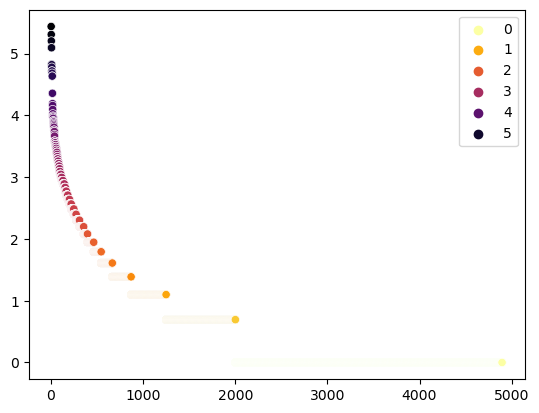

In [54]:
import math

# taking log 
term_frequencies_log = [math.log(i) for i in term_frequencies]

# sorting in decending order
log = np.sort(term_frequencies_log)[::-1]
term_num = range(1,4897)

sns.scatterplot(x=term_num, y=log, hue=log, palette='inferno_r')

It looks like exponential function. So we take $\log$ on the term numbers:

<Axes: xlabel='log_terms', ylabel='log_frequency'>

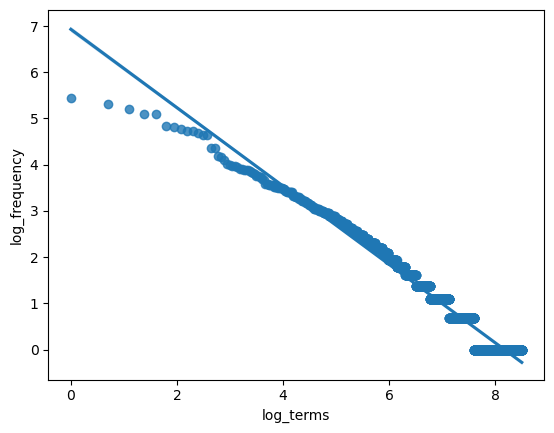

In [55]:
log_num = [math.log(i) for i in term_num]

df = pd.DataFrame({"log_terms": log_num, "log_frequency": log})

sns.regplot(x="log_terms", y="log_frequency", data=df)

The $\log-\log$ distribution is almost linear for a certain region; this is the so-called *power law* relationship (or *Zipf's law* in linguistics).

#### 3.5 Discretization and Binarization

Only `source` is a non-binary feature, so we just binarize it:

In [56]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()

mlb.fit(dataset.source)
dataset['bin_source'] = mlb.transform(dataset['source']).tolist()

dataset[::1000]

sentences  score        source  \
0     So there is no way for me to plug it in here i...      0  amazon_cells   
1013                                  It Was So Cool.        1          imdb   
2016                                Highly recommended.      1          yelp   

                                            sentences_t bin_source  
0     So there is no way for me to plug it in here i...  [1, 0, 0]  
1013                                   It Was So Cool    [0, 1, 0]  
2016                                 Highly recommended  [0, 0, 1]

Binarization is successful.

### 4 Data Exploration

Now, we take three random documents in the dataset:

In [57]:
document_to_transform_1 = []
random_record_1 = dataset.iloc[75]
random_record_1 = random_record_1['sentences']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = dataset.iloc[150]
random_record_2 = random_record_2['sentences']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = dataset.iloc[225]
random_record_3 = random_record_3['sentences']
document_to_transform_3.append(random_record_3)

print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['Love this product.']
['I Was Hoping for More.']
['These are certainly very comfortable and functionality is decent.']


Are the three sentences similar? We change it into term-document vectors, then binarize them; for each entry in the vectors, if it is nonzero we change it into 1, otherwise keep it as 0.

In [58]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


Now we calculate the similarity:

In [59]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000


They are not similar at all. This is not unexpected; in the 3 sentences there are not even one common word.

## Part 3: New Tasks

### 1. Visualization

Word cloud is a frequently used as a method to show the keywords around a given topic, information provider, or a group. These graphs are made by a bunch of related words. If the word is more frequently shown in the chosen category, then its size will be larger. Comparing to numerical analysis, words are more intuitive to grasp semantic features.

Let us see a word cloud for the whole dataset:

(Notice that due to unknown reason, one may need to import `wordcloud` manually, see [here](https://stackoverflow.com/questions/47298070/importerror-no-module-named-wordcloud).)

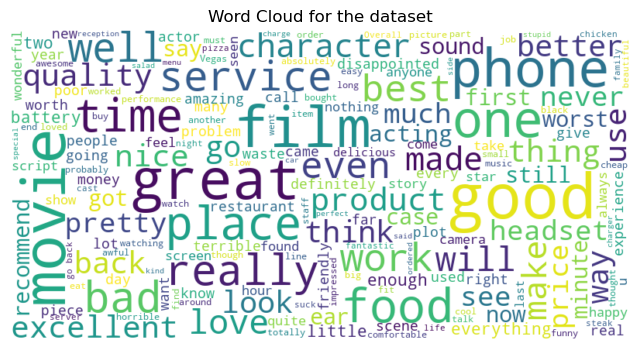

<Figure size 640x480 with 0 Axes>

In [60]:
import wordcloud
from wordcloud import WordCloud

# write a function for automation
def getcloud(data: str, bkc: str, cmap: str, text: str) -> wordcloud:
    wordcloud = WordCloud(width=800, height=400, background_color = bkc, 
                          colormap = cmap, max_words = 180,
                          contour_width = 3, max_font_size = 80, 
                          contour_color = 'steelblue', random_state = 0)

    wordcloud.generate(data)
    plt.figure(figsize=(8, 5))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.title(f'Word Cloud for {text}')
    plt.axis("off")
    plt.figure()
    return wordcloud


# WordCloud needs its own dictionary
# Dictionary is just a huge string with every word in, separated by spaces
data = " ".join(sentence for sentence in dataset.sentences)

getcloud(data=data, bkc='white', cmap='viridis_r', text='the dataset')


That's it. Nothing unexpected, because this is a corpus for comment on phones, movies, and restaurants.

Now we see the word cloud for different `scores`:

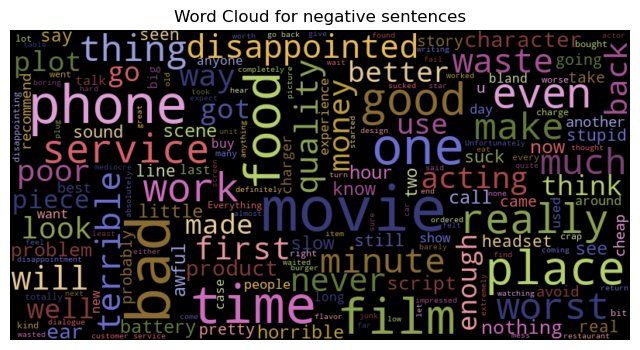

<Figure size 640x480 with 0 Axes>

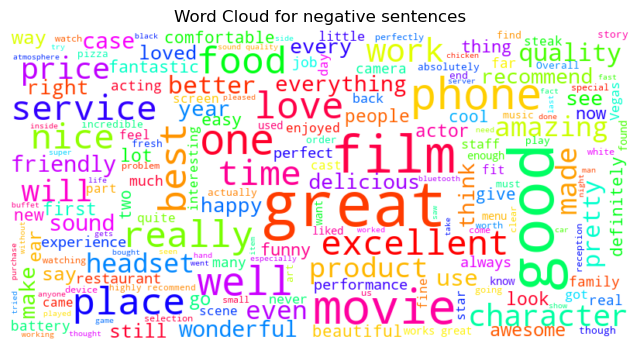

<Figure size 640x480 with 0 Axes>

In [61]:
negative =' '.join(sentense for sentense in dataset[dataset.score==0].sentences)
positive =' '.join(sentense for sentense in dataset[dataset.score==1].sentences)

getcloud(data=negative, bkc='black', cmap='tab20b', text='negative sentences')
getcloud(data=positive, bkc='white', cmap='hsv', text='negative sentences')

These two figures show that topics and sentiments are entangled. In the negative comments, the product or survice itself are mentioned more than in positive comments; in the positive comments there are more words to qualify evaluations. The topics and sentiments are not orthogonal, as we seen in the PCA section. This is a potential for further feature creation.

### 2: TF-IDF Features

TF-IDF is a frequently used way for weighting the importance of a term in a document.

The *basic ideas* are:
- *Locally speaking*: if a term shown in a specific document more, it may be more important for this document. This is measured by **term frequency (TF)**, i.e. the relative occurance rate of the term in *this specific* document.
- *Globally speaking*: if a term is shown everywhere in different documents, then it may be highly irrelevent to any specific topic we are interested in. This is measured by **inverse document frequency (IDF)**, i.e. the relative (binarized) occurance rate of the term in *all* documents, with a negative logarithm.

To think the weight must be of the form $\textrm{TF} \times \textrm{IDF}$ is just a heuristic, but one is easy to speculate it has something to do with information theory, since $\textrm{IDF}$ has a mysterious negative logarithm.

Let $D$ be the set of documents, $n_t = \{d \in D: t \in d\}$ be the absolute binarized frequency of a term $t$ occurs in the documents. We further denote the event of one *finding the term* as $t$, and *a specific document is fetched* as $d$.

Suppose that previously we don't know how many words $t$ is in any document. But we *expected* $t$ occurs in the documents, say, for a specific topic. Naively we may assume
$$ p(d|t) = \frac{1}{n_t}, p(t|d) = \frac{n_t}{|D|}, p(d)=\frac{1}{|D|}. $$
For each random $d$. That is, *if we see $t$ appears, we are uninformed which document it is in*.

Now the amounts of information you get from random document is
$$ H(D)= -\sum_d p(d)\log(p(d)) = \log |D|. $$

But for those case you see the word $t$, you *loss* information of amount
$$ H(D|t) = -\sum_d p(d|t) \log(p(d|t)) = \log (\frac{n_t}{|D|} \cdot |D|) = -\mathrm{IDF_t} + \log |D|,$$ 
because by assumption, those (indistinguishable) documents are already expected. 

Therefore, the true amounts of information you can get from those documents with respect to term $t$ would be
$$ H(D; t) \equiv p(t)[H(D)-H(D|t)] = p(t|d)p(d)\mathrm{IDF_t} = \frac{1}{|D|} p(t|d)\mathrm{IDF_t} $$

But since we assume we are uninformed sololy by $t$ about which document it could be, $p(t|d) \propto \mathrm{TF}_{t,d}$. That means $H(D; t) \propto \mathrm{TF}_{t,d}\mathrm{IDF_t}$.

This is not a prove for this heuristic, because the assumption is almost for sure *wrong*. If that assumption holds, then further we know the term frequencies for $t$ in each document are just the same, which is almost impossible. In real case we almost for sure can reasonably speculate a bit about which document $d$ we are reading, *sololy* by $\mathrm{TF}_{t,d}$, thus, $\mathrm{TF}_{t,d}\mathrm{IDF_t}$ is just related to an reasonable upper bound for $H(D;t)$.

Nevertheless, by the deduction above we can expect if we *normalize* the TF-IDF matrix, it should *work better*. Because normalization will reduce the variance of term frequencies contributed by the document length. The scikit-learn `TfidfVectorizer` allow us to do normalization on the matrix. It also smooths $\mathrm{IDF}$ by default to avoid it to be $0$ if a term is shown in every given documents.

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
tt = TfidfVectorizer(norm='l2') # normalization by L2 norm (default)
tt_2 = TfidfVectorizer(norm=None) # without normalization
count_vect_2 = CountVectorizer() # count vectorizer without stopwords

TF_IDF = tt.fit_transform(dataset.sentences).toarray()
TF_IDF_2 = tt_2.fit_transform(dataset.sentences).toarray()
dataset_counts_2 = count_vect_2.fit_transform(dataset.sentences).toarray()

TF_IDF.shape

(2979, 5155)

This time I did not use stopwords because those words should have a low tf-idf weight if not important at all. Let us compare the results from `TfidfVectorizer` with normalization, without normalization, and `TfidfVectorizer`. Our example is the first sentence in the dataset.

In [63]:
# find the position of terms in the first sentence
pos = np.where(TF_IDF[0] != 0)[0]

# create dataframe for weights or counts on those terms
tt_weight = pd.DataFrame(
    {'Terms': [tt.get_feature_names_out()[i] for i in pos],
     'Weight': [TF_IDF[0][i] for i in pos]
    })

tt_2_weight = pd.DataFrame(
    {'Terms': [tt_2.get_feature_names_out()[i] for i in pos],
     'Weight': [TF_IDF_2[0][i] for i in pos]
    })

cv_weight = pd.DataFrame(
    {'Terms': [count_vect_2.get_feature_names_out()[i] for i in pos],
     'Count': [dataset_counts_2[0][i] for i in pos]
    })

# merge dataframes
merged = tt_weight.merge(tt_2_weight, on='Terms',suffixes=('_1', '_2'))
merged_2 = merged.merge(cv_weight, on='Terms')

display(merged_2)

Terms  Weight_1  Weight_2  Count
0          by  0.223363  4.655873      1
1   converter  0.398501  8.306531      1
2         for  0.156391  3.259886      1
3          go  0.231491  4.825291      1
4        here  0.222744  4.642970      1
5          in  0.295340  6.156200      2
6          is  0.120658  2.515043      1
7          it  0.119643  2.493895      1
8          me  0.228626  4.765572      1
9          no  0.223363  4.655873      1
10       plug  0.308702  6.434729      1
11         so  0.187385  3.905928      1
12        the  0.086569  1.804491      1
13      there  0.207578  4.326850      1
14         to  0.127410  2.655798      1
15     unless  0.331994  6.920237      1
16         us  0.275449  5.741582      1
17        way  0.249132  5.193016      1

One can see even many words have equal counts `1`, they don't have the same tf-idf weight. Furthermore, the normalized TFIDF vector have a much smaller variance:

In [64]:
print("Variance for normalized TFIDF: %(x)f" %{"x":np.var(tt_weight.Weight)})
print("Variance for raw TFIDF: %(x)f" % {"x":np.var(tt_2_weight.Weight)})

Variance for normalized TFIDF: 0.006313
Variance for raw TFIDF: 2.742724


### 3: Naive Bayes Classifier

Naive Bayes classifiers are a class of classifier which assume the distributions of the input features are all mutually independent (thus *naive*), and doing induction by Bayes' rule (thus *Bayes*). The general principle is so called *maximum a posteriori probability*: it always output the most possible category given the features and the observed probabilities of having those features conditional on different categories.

Different naive Bayes classifier are majorly distinct on how many possible values the related features can have.
- If the features are all *binary*, then we use *Bernoulli* naive Bayes. That is, we assume those features follow the Bernoulli distribution.
- If the features are all *discrete*, then we use *multinomial* naive Bayes. That is, we assume those features follow the multinomial distribution.
- If the features are all *continuous*, then we use *Gaussian* naive Bayes. That is, we assume those features follow the Gaussian distribution.

In this case, the input features are frequencies of words: discrete, but not binary. So we should use multinomial naive Bayes classifier.

We first see how acturate it can predict the `score` category (with different vectorizers):

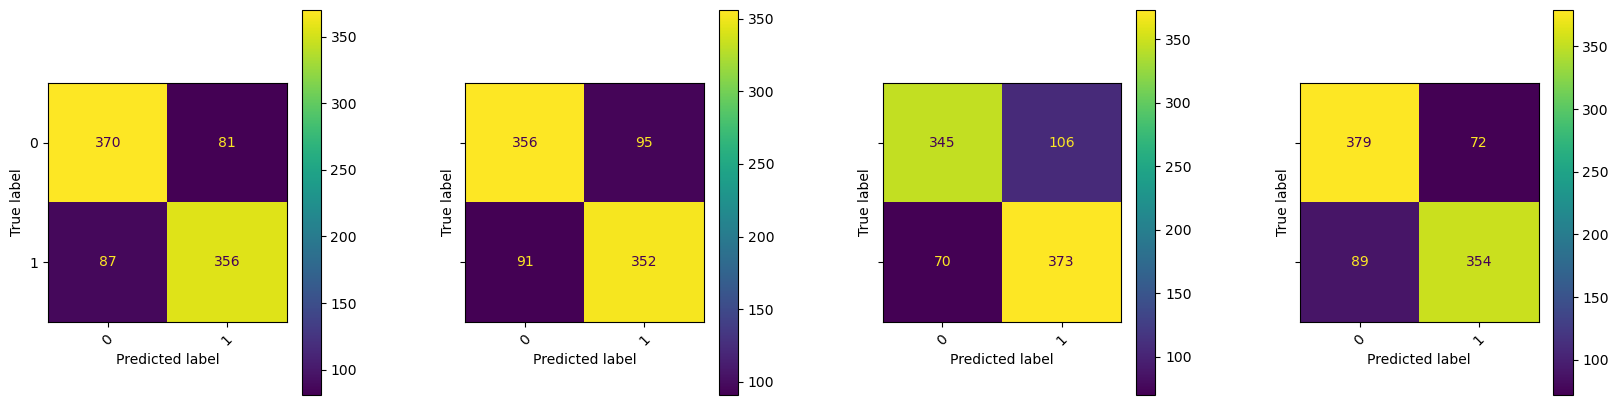

Normalized TF-IDF accuracy: 0.8120805369127517
Raw TF-IDF accuracy: 0.7919463087248322
Counting with stopwords accuracy: 0.8031319910514542
Raw counting accuracy: 0.819910514541387


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

# setting target category for prediction
target = dataset['score']

# setting the source of features
tt_src = pd.DataFrame(TF_IDF, index=dataset.index) # tt: normalized tf-idf
tt_2_src = pd.DataFrame(TF_IDF_2, index=dataset.index) # tt_2: raw tf-idf
cv_src = pd.DataFrame(dataset_counts.toarray(), index=dataset.index) # cv: count vectorizer with stopwords
cv_2_src = pd.DataFrame(dataset_counts_2, index=dataset.index) # cv_2: raw count vectorizer

# separating training data and test data
X_tt_train, X_tt_test, Y_tt_train, Y_tt_test = train_test_split(tt_src, target, test_size=0.3, random_state=17)
X_tt_2_train, X_tt_2_test, Y_tt_2_train, Y_tt_2_test = train_test_split(tt_2_src, target, test_size=0.3, random_state=17)
X_cv_train, X_cv_test, Y_cv_train, Y_cv_test = train_test_split(cv_src, target, test_size=0.3, random_state=17)
X_cv_2_train, X_cv_2_test, Y_cv_2_train, Y_cv_2_test = train_test_split(cv_2_src, target, test_size=0.3, random_state=17)

# Naive Bayes Classification
tt_NB = MultinomialNB()
Y_tt_pred = tt_NB.fit(X_tt_train, Y_tt_train).predict(X_tt_test)
tt_2_NB = MultinomialNB()
Y_tt_2_pred = tt_2_NB.fit(X_tt_2_train, Y_tt_2_train).predict(X_tt_2_test)
cv_NB = MultinomialNB()
Y_cv_pred = cv_NB.fit(X_cv_train, Y_cv_train).predict(X_cv_test)
cv_2_NB = MultinomialNB()
Y_cv_2_pred = cv_2_NB.fit(X_cv_2_train, Y_cv_2_train).predict(X_cv_2_test)

# confusion matries
f, axes = plt.subplots(1, 4, figsize=(20, 5), sharey='row')
disp_0 = ConfusionMatrixDisplay.from_predictions(Y_tt_test, Y_tt_pred, 
                                                 ax=axes[0], xticks_rotation=45)
disp_1 = ConfusionMatrixDisplay.from_predictions(Y_tt_2_test, Y_tt_2_pred, 
                                                 ax=axes[1], xticks_rotation=45)
disp_2 = ConfusionMatrixDisplay.from_predictions(Y_cv_test, Y_cv_pred, 
                                                 ax=axes[2], xticks_rotation=45)
disp_3 = ConfusionMatrixDisplay.from_predictions(Y_cv_2_test, Y_cv_2_pred, 
                                                 ax=axes[3], xticks_rotation=45)
plt.subplots_adjust(wspace=0.40, hspace=0.1)
plt.show()


# accuracy
print("Normalized TF-IDF accuracy:", accuracy_score(Y_tt_pred, Y_tt_test))
print("Raw TF-IDF accuracy:", accuracy_score(Y_tt_2_pred, Y_tt_2_test))
print("Counting with stopwords accuracy:", accuracy_score(Y_cv_pred, Y_cv_test))
print("Raw counting accuracy:", accuracy_score(Y_cv_2_pred, Y_cv_2_test))

After trying several random_states, I have the following observations:
- In general, the accuracy for `score` prediction is $\approx 80\%$ for Naive Bayes classifier. Classification algorithm is more important than (valid) data preprocessing method in this case.
- *Normalized* TF-IDF accuracy usually works slightly better than raw TF-IDF, which is as expected.
- Counting method usually works slightly better *without* stopwords. There are similar amounts of false negative, but with stopwords there is more false positive. This support the speculation about stopwords excluded words for negation. The lesson is I should use stopwords carefully.
- Comparing normalized TF-IDF and raw counting, there is no much difference in accuracy. But many times *raw counting* works better. It is a very interesting phenomenon: TF-IDF is more complex but does not perform better. My speculation: The word for topics and sentiments are so frequently shown in short comments. Thus, their TF-IDF weights are low.

Now let us see if the classifier works well for `source`.

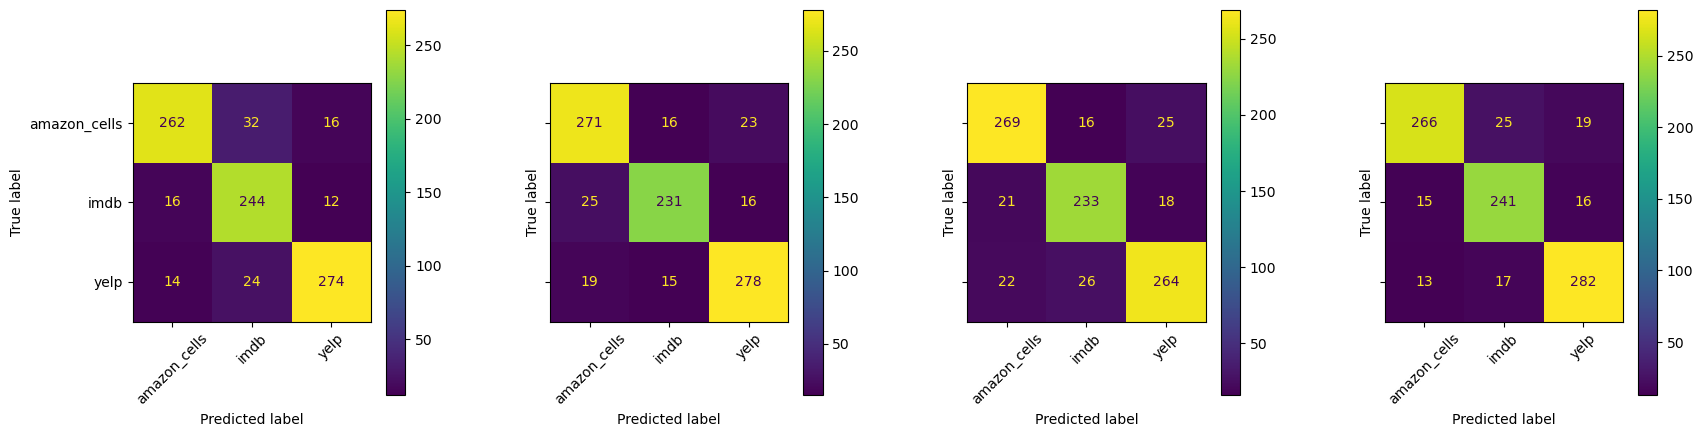

Normalized TF-IDF accuracy: 0.87248322147651
Raw TF-IDF accuracy: 0.87248322147651
Counting with stopwords accuracy: 0.8568232662192393
Raw counting accuracy: 0.8825503355704698


In [66]:
# setting target category for prediction
target = dataset['source']

# setting the source of features
tt_src = pd.DataFrame(TF_IDF, index=dataset.index) # tt: normalized tf-idf
tt_2_src = pd.DataFrame(TF_IDF_2, index=dataset.index) # tt_2: raw tf-idf
cv_src = pd.DataFrame(dataset_counts.toarray(), index=dataset.index) # cv: count vectorizer with stopwords
cv_2_src = pd.DataFrame(dataset_counts_2, index=dataset.index) # cv_2: raw count vectorizer

# separating training data and test data
X_tt_train, X_tt_test, Y_tt_train, Y_tt_test = train_test_split(tt_src, target, test_size=0.3, random_state=17)
X_tt_2_train, X_tt_2_test, Y_tt_2_train, Y_tt_2_test = train_test_split(tt_2_src, target, test_size=0.3, random_state=17)
X_cv_train, X_cv_test, Y_cv_train, Y_cv_test = train_test_split(cv_src, target, test_size=0.3, random_state=17)
X_cv_2_train, X_cv_2_test, Y_cv_2_train, Y_cv_2_test = train_test_split(cv_2_src, target, test_size=0.3, random_state=17)

# Naive Bayes Classification
tt_NB = MultinomialNB()
Y_tt_pred = tt_NB.fit(X_tt_train, Y_tt_train).predict(X_tt_test)
tt_2_NB = MultinomialNB()
Y_tt_2_pred = tt_2_NB.fit(X_tt_2_train, Y_tt_2_train).predict(X_tt_2_test)
cv_NB = MultinomialNB()
Y_cv_pred = cv_NB.fit(X_cv_train, Y_cv_train).predict(X_cv_test)
cv_2_NB = MultinomialNB()
Y_cv_2_pred = cv_2_NB.fit(X_cv_2_train, Y_cv_2_train).predict(X_cv_2_test)

# confusion matries
f, axes = plt.subplots(1, 4, figsize=(20, 5), sharey='row')
disp_0 = ConfusionMatrixDisplay.from_predictions(Y_tt_test, Y_tt_pred, 
                                                 ax=axes[0], xticks_rotation=45)
disp_1 = ConfusionMatrixDisplay.from_predictions(Y_tt_2_test, Y_tt_2_pred, 
                                                 ax=axes[1], xticks_rotation=45)
disp_2 = ConfusionMatrixDisplay.from_predictions(Y_cv_test, Y_cv_pred, 
                                                 ax=axes[2], xticks_rotation=45)
disp_3 = ConfusionMatrixDisplay.from_predictions(Y_cv_2_test, Y_cv_2_pred, 
                                                 ax=axes[3], xticks_rotation=45)
plt.subplots_adjust(wspace=0.40, hspace=0.1)
plt.show()


# accuracy
print("Normalized TF-IDF accuracy:", accuracy_score(Y_tt_pred, Y_tt_test))
print("Raw TF-IDF accuracy:", accuracy_score(Y_tt_2_pred, Y_tt_2_test))
print("Counting with stopwords accuracy:", accuracy_score(Y_cv_pred, Y_cv_test))
print("Raw counting accuracy:", accuracy_score(Y_cv_2_pred, Y_cv_2_test))

It works better - the accuracy is $\approx 87\%$, better than classifying `score`. This fits the observation in the section for PCA (end of section 3.2, part 2): `source` seems more separable than `score`.

The four observations above still hold. But in this case counting with stopwords still preforms a little poorer. It is also an interesting phenomenon.

## Part 4: Suggestions

There are several suggestions could be made.

1. About *sampling*. The sample is not quite necessary to be used through out the analysis. 
   - First, both 20 Newsgroup dataset and Sentiment Labeling dataset are quite small. Only heatmap needs sampling. 
   - Second, Sample should be generated *after* tokenization. If one samples before tokenization, the number of terms occur in the sample will be smaller than population. This is easy to induce dimension mismatch error.
2. About *sparse matrix*. I am not familar with how to utilize these sparse matrix. In this analysis I always expend then into usual (nested) arrays, because there are a lot of direct access to those matrix. But I think this is exactly because NumPy is not good at treating sparse matrix (well, the matrices are data structures in SciPy).
3. About *tokenization*. 
    - There is actually no need for `nltk` directly. The `unigrams` are also not used. The `nltk` is said to be good for preprocessing, but is not as good as for scikit-learn analysis.
    - The issue about possible over-preprocessing. Intuitively, we can screen out words that seems to be not useful via stopwords or later TF-IDF vectorization. But the Sentiment Labeling case shows that it is not always true. I speculate that if the documents are not long, the infomation loss would be higher if we drop words, because when we say things in short, we just use flat words.
4. About the *heatmap*. We actually do not need to create a heatmap at that moment. Heatmaps are computationally costly, and there are more effective visualization ways (e.g. word clouds) for mere exploration. Usually, heatmaps are used for simliarity matrix.
5. About *binarization*. This step is also not obviously useful for our purpose, since the naive bayes classifier do not need binarization. Usual discretization works.
6. About *data exploration*. Perhaps we should calculate the similarity matrix on a sample, and then transform it into heatmap.